<a href="https://colab.research.google.com/github/Vedant-Gupta-02/App/blob/main/BTP_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# df = pd.read_csv('/content/Walk_S1_I0.txt')

In [ ]:
df_S1_I0 = pd.read_csv('/content/drive/MyDrive/Vedant_FSR/Walk_S1_I0.txt')
df_S1_I5 = pd.read_csv('/content/drive/MyDrive/Vedant_FSR/Walk_S1_I5.txt')
df_S1_I10 = pd.read_csv('/content/drive/MyDrive/Vedant_FSR/Walk_S1_I10.txt')
df_S3_I0 = pd.read_csv('/content/drive/MyDrive/Vedant_FSR/Walk_S3_I0.txt')
df_S3_I5 = pd.read_csv('/content/drive/MyDrive/Vedant_FSR/Walk_S3_I5.txt')
df_S3_I10 = pd.read_csv('/content/drive/MyDrive/Vedant_FSR/Walk_S3_I10.txt')
df_S5_I0 = pd.read_csv('/content/drive/MyDrive/Vedant_FSR/Walk_S5_I0.txt')
df_S5_I5 = pd.read_csv('/content/drive/MyDrive/Vedant_FSR/Walk_S5_I5.txt')
df_S5_I10 = pd.read_csv('/content/drive/MyDrive/Vedant_FSR/Walk_S5_I10.txt')

In [ ]:
import pandas as pd
import plotly.express as px

# # Example dataframe
# data = {
#     'x': [1, 2, 3, 4, 5],
#     'y1': [10, 15, 13, 18, 20],
#     'y2': [8, 12, 10, 14, 16],
#     'y3': [5, 9, 7, 11, 13]
# }

# df = pd.DataFrame(data)

# Plotting using Plotly Express
fig = px.line(df_S5_I10, y=['Heel', 'Toe_Left','Toe_Right'], x=df_S5_I10.index,)
# fig = px.line(df_S5_I10, y='Heel', x=df_S5_I10.index, )
# fig = px.line(df_S1_I5, y='Toe_Left', x=df_S1_I0.index, )
# fig = px.line(df_S1_I5, y='Toe_Right', x=df_S1_I0.index, )
# fig = px.line(df_S5_I10, y=['Heel', 'Toe_Left'], x=df_S5_I10.index,)
# fig = px.line(df_S5_I10, y=['Heel', 'Toe_Right'], x=df_S5_I10.index,)

fig.show()


In [ ]:
df_S1_I0.head()

,Heel,Toe_Left,Toe_Right
0,-0.020,0.030,0.035
1,-0.025,0.030,0.035
2,-0.020,0.025,0.025
3,-0.020,0.030,0.025
4,-0.025,0.030,0.015


In [ ]:
df_S1_I0['Toe'] = 0
df_S1_I0['Toe'] = df_S1_I0['Toe_Left']+df_S1_I0['Toe_Right']

In [ ]:
df_S1_I0['Heel'] = (df_S1_I0['Heel'] - df_S1_I0['Heel'].min()) / (df_S1_I0['Heel'].max() - df_S1_I0['Heel'].min())
df_S1_I0['Toe'] = (df_S1_I0['Toe'] - df_S1_I0['Toe'].min()) / (df_S1_I0['Toe'].max() - df_S1_I0['Toe'].min())

In [ ]:
print(df_S1_I0['Heel'].mean())
print(df_S1_I0['Toe'].mean())

0.34652297905012613
0.3951770917466869


In [ ]:
print(df_S1_I0['Heel'].std())
print(df_S1_I0['Toe'].std())

0.3025067979868446
0.2626722018553149


In [ ]:
print(df_S1_I0['Heel'].max())
print(df_S1_I0['Toe'].max())

1.0
1.0


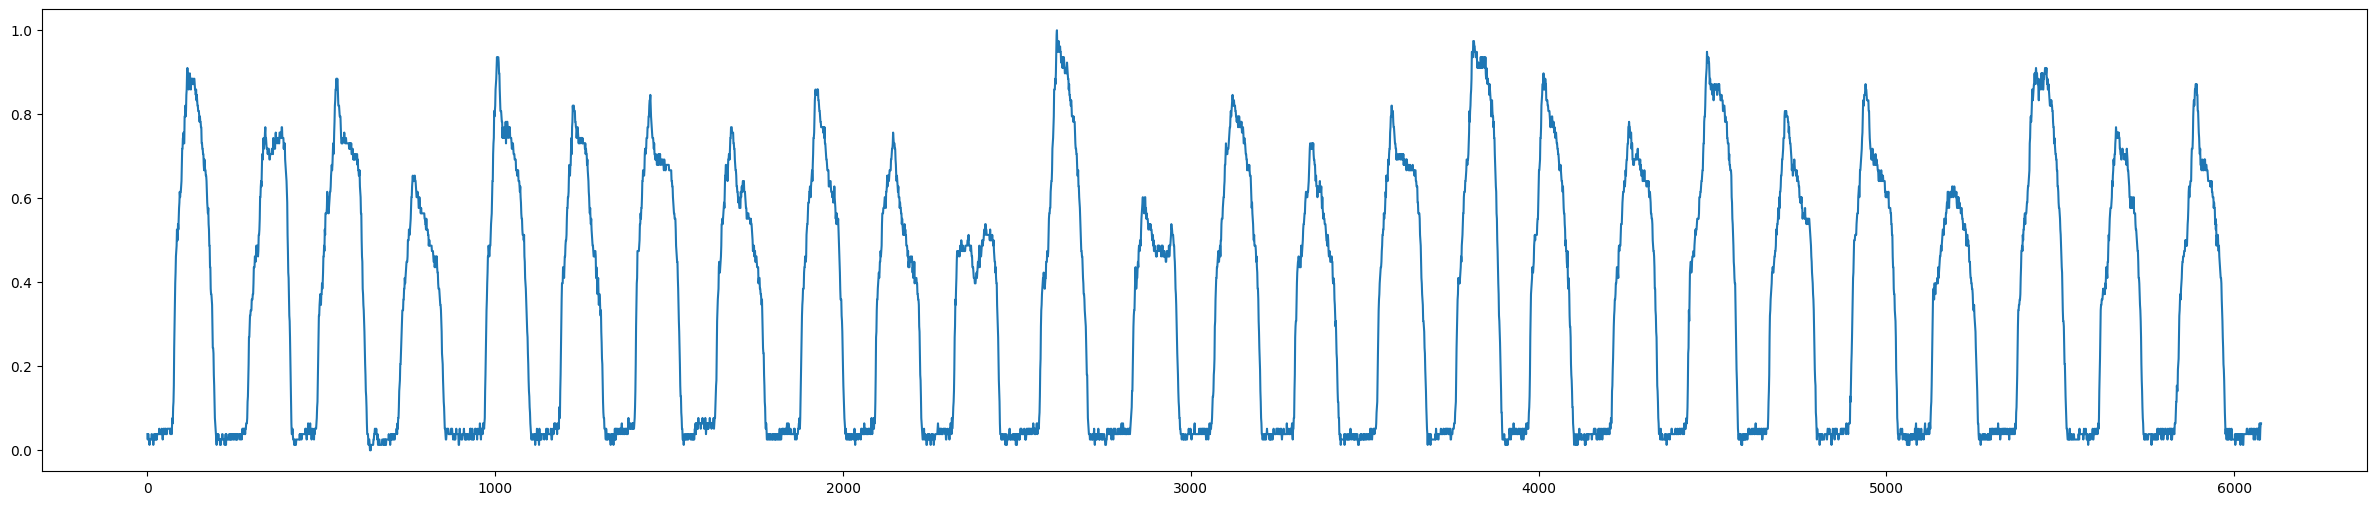

In [ ]:
plt.figure(figsize=(30,6))
plt.plot(df_S1_I0['Heel'])

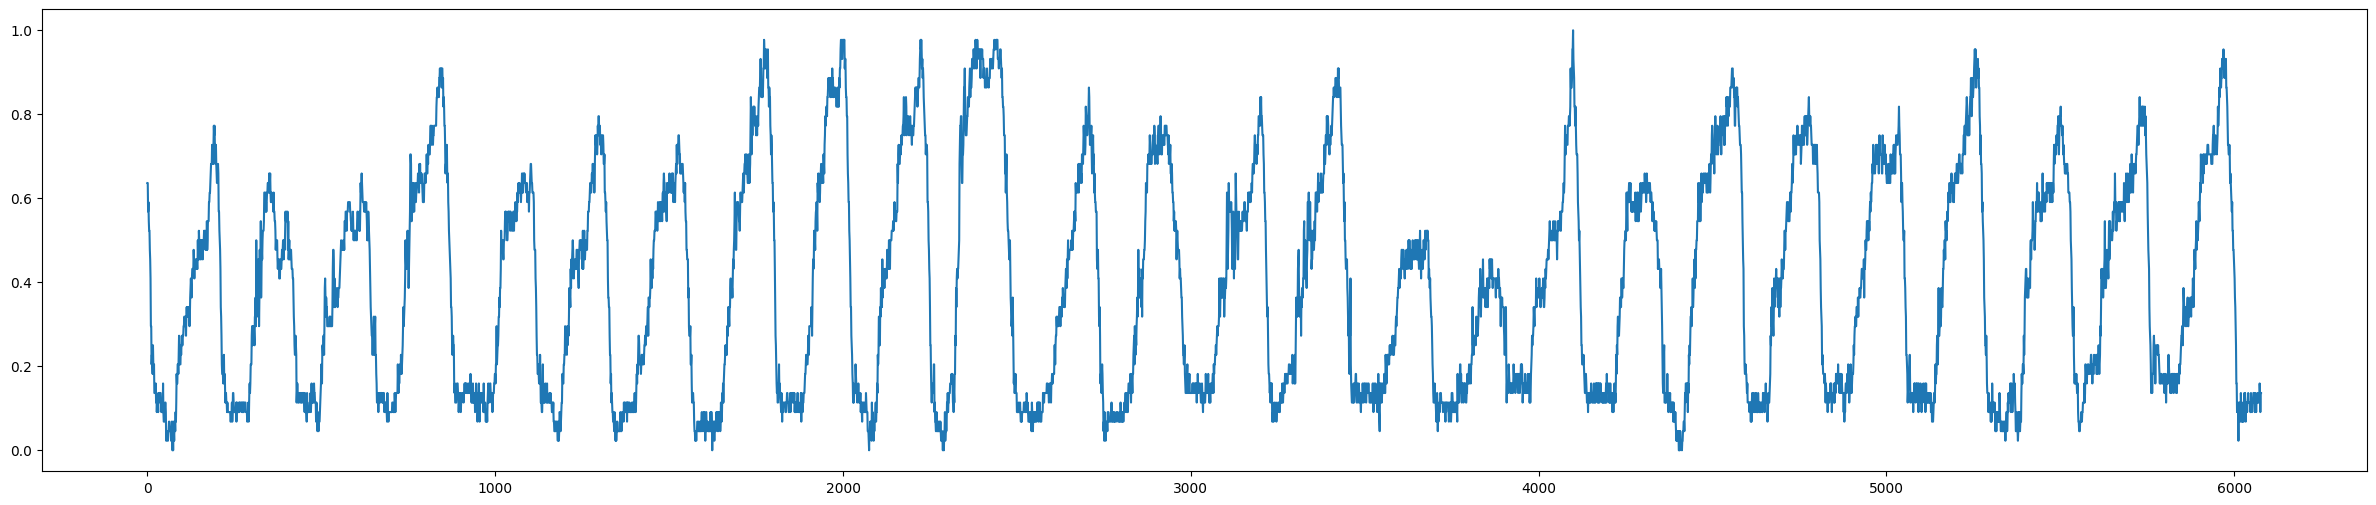

In [ ]:
plt.figure(figsize=(30,6))
plt.plot(df_S1_I0['Toe'])

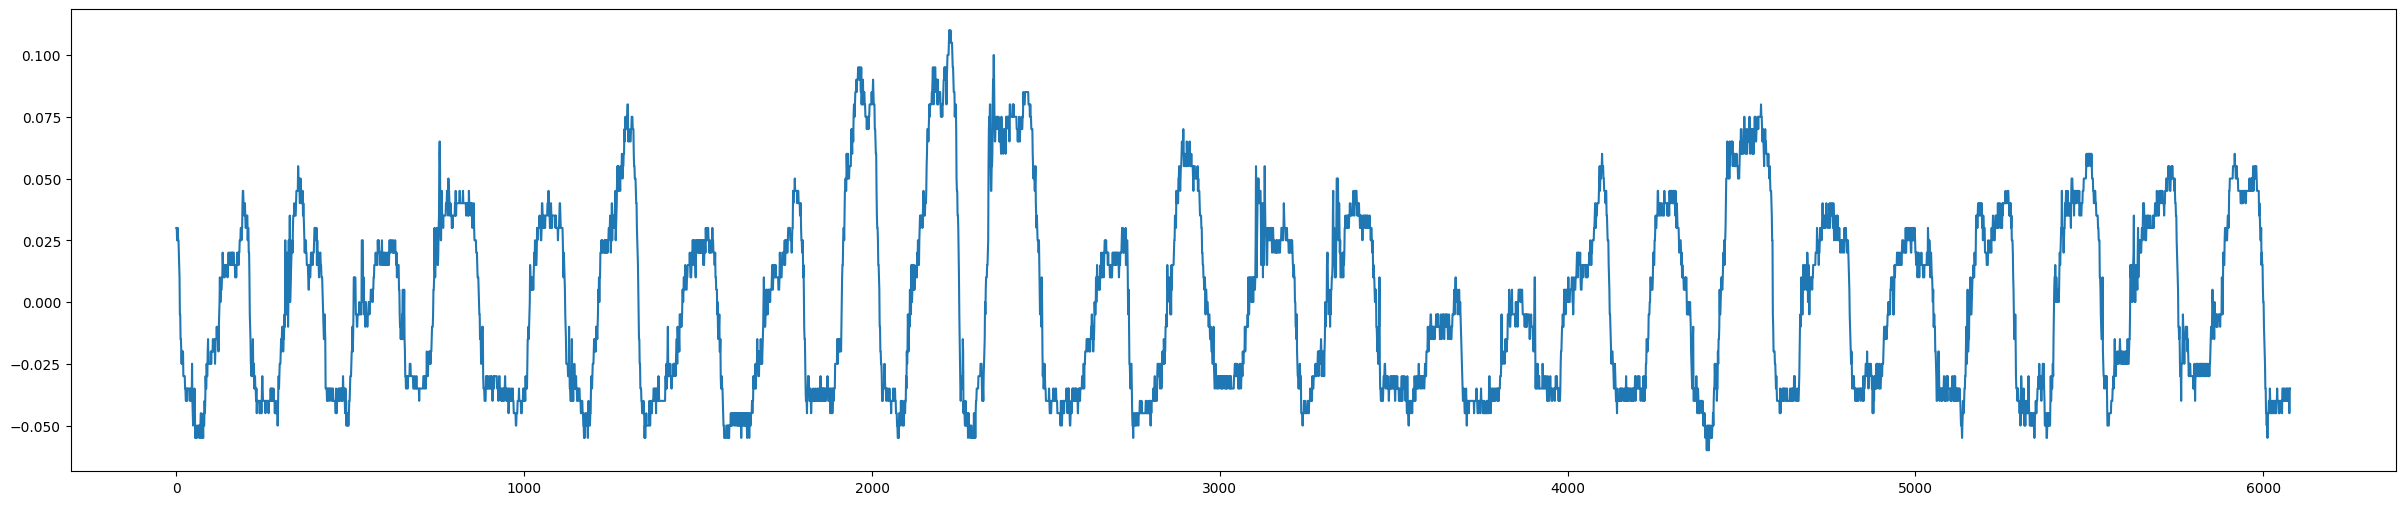

In [ ]:
plt.figure(figsize=(30,6))
plt.plot(df_S1_I0['Toe_Left'])

In [ ]:
import warnings

In [ ]:
df_S1_I0['Gait'] = 0
df_S1_I0['GP'] = 0
df_S1_I0['TM'] = 0

In [ ]:
warnings.filterwarnings(action='ignore')
for i in range(len(df_S1_I0)):
  h = df_S1_I0['Heel'][i]
  t = df_S1_I0['Toe'][i]
  if(h>0.35 and t>0.3):
    df_S1_I0['Gait'][i] = 0 #'T1H1'
  elif(h<0.35 and t<0.3):
    df_S1_I0['Gait'][i] = 2 #'T0H0'
  elif(h<0.4):
    df_S1_I0['Gait'][i] = 1 #'T1H0'
  elif(h>0.4):
    df_S1_I0['Gait'][i] = 3 #'T0H1'

In [ ]:
for i in range(len(df_S1_I0)):
  g = df_S1_I0['Gait'][i]
  if(g==2):
    df_S1_I0['GP'][i] = 0 #'Swing'
  else:
    df_S1_I0['GP'][i] = 1 #'Stance'

In [ ]:
df_S1_I0['GP'].value_counts()

,count
GP,
1,3840
0,2239


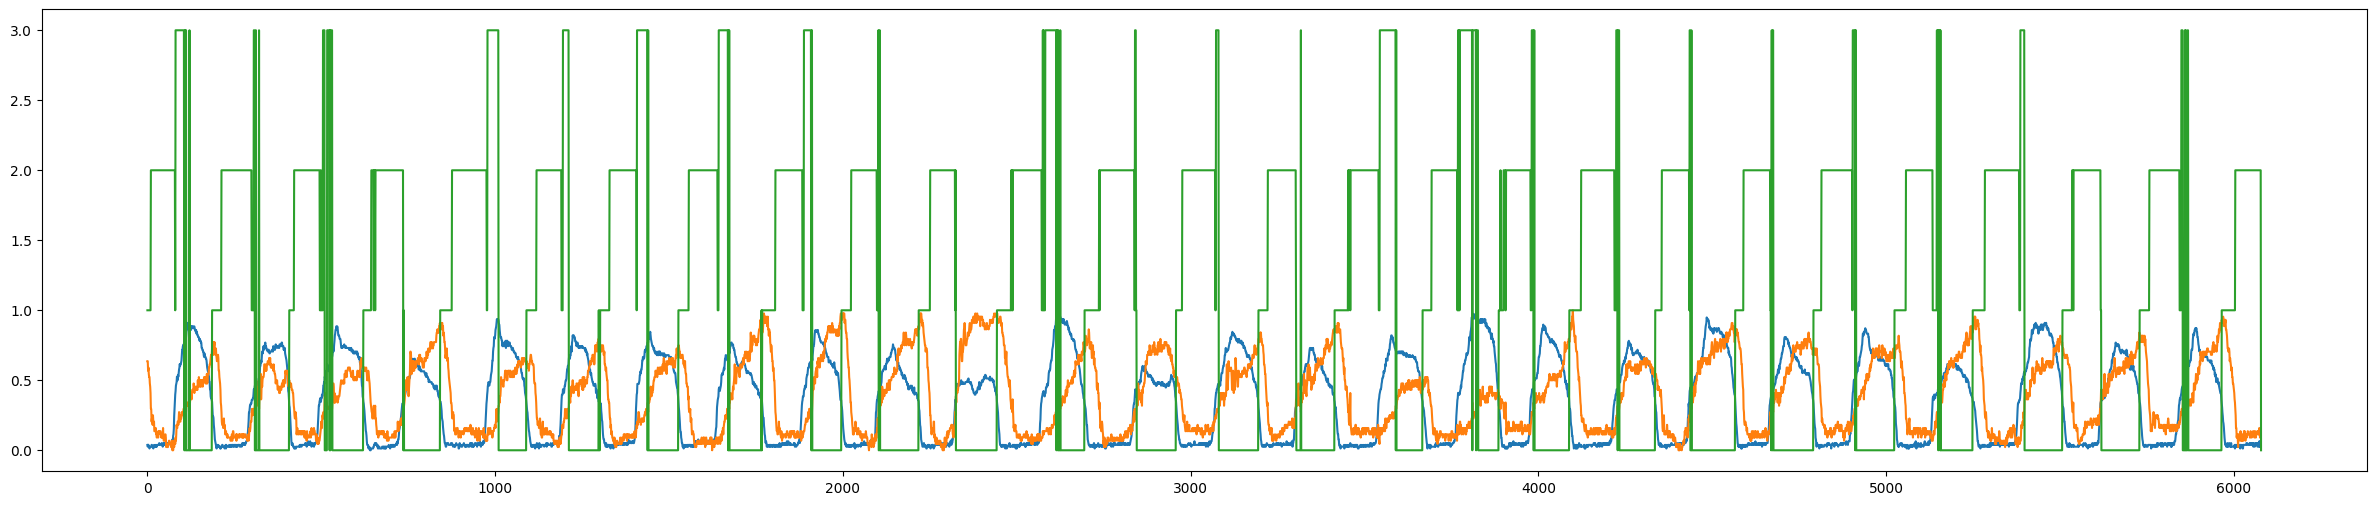

In [ ]:
plt.figure(figsize=(30, 6))
plt.plot(df_S1_I0['Heel'])
plt.plot(df_S1_I0['Toe'])
plt.plot(df_S1_I0['Gait'])

In [ ]:
df = df_S1_I0_cleaned
start_date = '2022-01-01'
frequency = 'D'
date_range = pd.date_range(start=start_date, periods=len(df), freq=frequency)

df.index = date_range
df.index = pd.to_datetime(df.index)

NameError: name 'df_S1_I0_cleaned' is not defined

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['smoothed_Toe_Left'], model='additive', extrapolate_trend='freq')
plt.figure(figsize=(30, 6))
plt.plot(df.index, decomposition.trend, label='Trend')

NameError: name 'df' is not defined

Taking max values of FSR

In [ ]:
# def find_local_extrema(df, column, around_range):
#     """
#     Find the positions of local maximas and minimas in the data.

#     Parameters:
#     - df: DataFrame, must contain a column with the data
#     - column: str, the column containing the data
#     - around_range: int, the range to compare each value with its surrounding values

#     Returns:
#     - Tuple of lists containing positions of maximas and minimas
#     """
#     maxima_positions = []
#     # minima_positions = []

#     for i in range(around_range, len(df[column]) - around_range):
#         value = df[column].iloc[i]
#         preceding_values = df[column].iloc[i - around_range:i].tolist()
#         subsequent_values = df[column].iloc[i + 1:i + around_range + 1].tolist()

#         if value > max(preceding_values) and value > max(subsequent_values):
#             maxima_positions.append(value)
#         # elif value < min(preceding_values) and value < min(subsequent_values):
#         #     minima_positions.append(df['frame'].iloc[i])

#     # return maxima_positions, minima_positions
#     return maxima_positions

In [ ]:
def find_local_extrema(df, around_range):
    """
    Find the positions of local maximas in the data.

    Parameters:
    - df: DataFrame, must contain columns with the data
    - around_range: int, the range to compare each value with its surrounding values

    Returns:
    - List containing positions (indices) of maximas
    """
    maxima_positions = []

    for i in range(around_range, len(df) - around_range):
        values = df.iloc[i - around_range:i + around_range + 1].max()
        max_value = values.max()
        if df.iloc[i][values.idxmax()] == max_value:
            maxima_positions.append((i, values.idxmax()))

    return maxima_positions

In [ ]:
import pandas as pd

def remove_noise(df, window_size):
    """
    Apply a moving average to remove noise from a column in a DataFrame.

    Parameters:
    - df: DataFrame
    - column: str, the column containing noisy data
    - window_size: int, the size of the moving average window

    Returns:
    - DataFrame with noise removed
    """
    # Use the rolling function to calculate the moving average
    for col in df.columns[:3]:
      df['smoothed_' + col] = df[col].rolling(window=window_size, center=True).mean()

    # Drop rows with NaN values introduced by the rolling mean
    df_cleaned = df.dropna()

    return df_cleaned

# Example usage:
# Assuming 'frame' is the column for x-axis and 'value' is the noisy data column
df_S1_I0_cleaned = remove_noise(df_S1_I0, window_size=10)

<ipython-input-25-8bc97e72c76c>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoothed_' + col] = df[col].rolling(window=window_size, center=True).mean()
<ipython-input-25-8bc97e72c76c>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoothed_' + col] = df[col].rolling(window=window_size, center=True).mean()
<ipython-input-25-8bc97e72c76c>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

In [ ]:
data = {
    'Heel': [],
    'Toe_Left': [],
    'Toe_Right':  []
}

max_S1_I0 = pd.DataFrame(data)
max_S3_I0 = pd.DataFrame(data)
max_S5_I0 = pd.DataFrame(data)
max_S1_I5 = pd.DataFrame(data)
max_S3_I5 = pd.DataFrame(data)
max_S5_I5 = pd.DataFrame(data)
max_S1_I10 = pd.DataFrame(data)
max_S3_I10 = pd.DataFrame(data)
max_S5_I10 = pd.DataFrame(data)

In [ ]:
print(df_S1_I0_cleaned.columns)

Index(['Heel', 'Toe_Left', 'Toe_Right', 'smoothed_Heel', 'smoothed_Toe_Left',
       'smoothed_Toe_Right'],
      dtype='object')


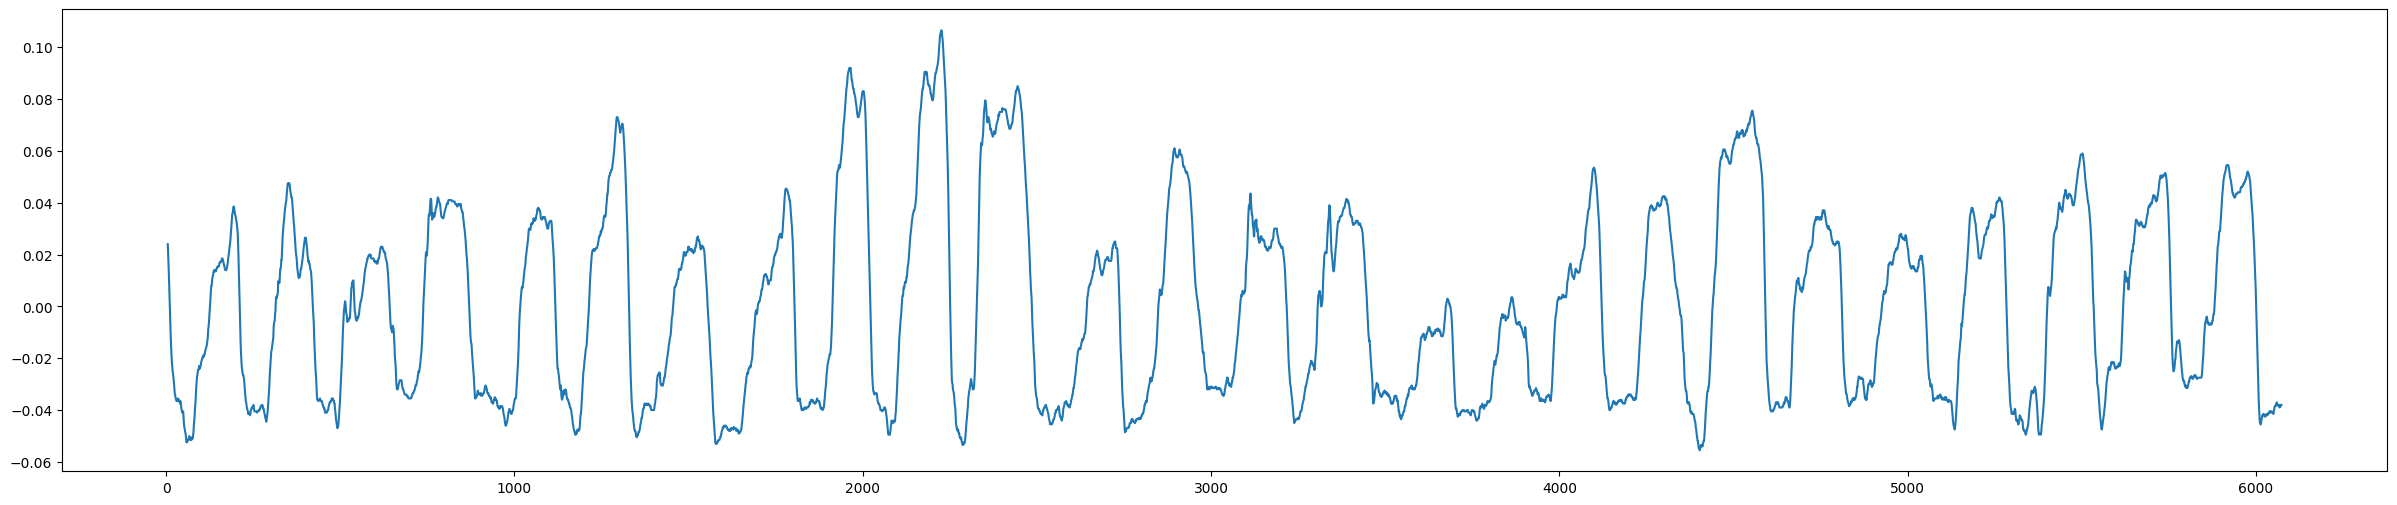

In [ ]:
plt.figure(figsize=(30,6))
plt.plot(df_S1_I0_cleaned['smoothed_Toe_Left'])

In [ ]:
for column in df_S1_I0_cleaned.columns[-3:]:
  print(column)
  max_S1_I0[column] = find_local_extrema(df_S1_I0, column, 20)

smoothed_Heel
smoothed_Toe_Left


ValueError: Length of values (31) does not match length of index (23)

In [ ]:
for column in df_S3_I0:
  max_S3_I0[column] = find_local_extrema(df_S3_I0, column, 10)

ValueError: Length of values (70) does not match length of index (60)

In [ ]:
for column in df_S5_I0:
  max_S5_I0[column] = find_local_extrema(df_S5_I0, column, 10)

In [ ]:
for column in df_S1_I5:
  max_S1_I5[column] = find_local_extrema(df_S1_I5, column, 10)

In [ ]:
for column in df_S3_I5:
  max_S3_I5[column] = find_local_extrema(df_S3_I5, column, 10)

In [ ]:
for column in df_S5_I5:
  max_S5_I5[column] = find_local_extrema(df_S5_I5, column, 10)

In [ ]:
for column in df_S1_I10:
  max_S1_I10[column] = find_local_extrema(df_S1_I10, column, 10)

In [ ]:
for column in df_S3_I10:
  max_S3_I10[column] = find_local_extrema(df_S3_I10, column, 10)

In [ ]:
for column in df_S5_I10:
  max_S5_I10[column] = find_local_extrema(df_S5_I10, column, 10)

EMG Processing

In [ ]:
import pandas as pd
import numpy as np
from scipy.signal import butter, filtfilt
from sklearn.preprocessing import StandardScaler

In [ ]:
def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    y = filtfilt(b, a, data)
    return y

def preprocess_emg_signals(df):
    fs = 1000  # Sample rate (Hz)
    lowcut = 20  # Low cutoff frequency (Hz)
    highcut = 450  # High cutoff frequency (Hz)
    order = 4  # Filter order

    # Apply bandpass filter to each EMG signal column
    for col in df.columns:
        df[col] = butter_bandpass_filter(df[col].values, lowcut, highcut, fs, order)

    # Standardize the data (mean=0, std=1) across columns
    scaler = StandardScaler()
    df[df.columns] = scaler.fit_transform(df[df.columns])

    return df

In [ ]:
data = df[["""emg columns"""]]
processed_df = preprocess_emg_signals(data)
print(processed_df.head())

In [ ]:
df_anfis = pd.read_csv('/content/Vedant_anfis.csv')

In [ ]:
df_anfis.head()

,Heel,Toe_right,Toe_left,inclination,speed
0,0.320,0.055,0.045,0,1
1,0.265,0.025,0.055,0,1
2,0.310,0.045,0.025,0,1
3,0.220,0.085,0.065,0,1
4,0.330,0.035,0.045,0,1


In [ ]:
df_anfis = df_anfis.drop(['inclination'], axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame
# Define your features (X) and target variable (y)
X = df_anfis.drop(columns=['speed'])
y = df_anfis['speed']

# Split the dataset into training and testing sets
# You can specify the test_size parameter to determine the size of the testing set
# random_state parameter is used for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

# Create new DataFrames for training and testing sets
df_train = X_train.join(y_train)
df_test = X_test.join(y_test)


In [ ]:
df_train.to_csv('anfis_train.csv', index = False)
df_test.to_csv('anfis_test.csv', index = False)

# Paper Implementation SBLSTM

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, LSTM, Bidirectional, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint

### Import data and data Preprocessing

In [ ]:
df_S1_I0 = pd.read_csv('/content/drive/MyDrive/BTP_2/FSR_prep/Vedant/Walk_S1_I0.txt')
df_S1_I5 = pd.read_csv('/content/drive/MyDrive/BTP_2/FSR_prep/Vedant/Walk_S1_I5.txt')
df_S1_I10 = pd.read_csv('/content/drive/MyDrive/BTP_2/FSR_prep/Vedant/Walk_S1_I10.txt')
df_S3_I0 = pd.read_csv('/content/drive/MyDrive/BTP_2/FSR_prep/Vedant/Walk_S3_I0.txt')
df_S3_I5 = pd.read_csv('/content/drive/MyDrive/BTP_2/FSR_prep/Vedant/Walk_S3_I5.txt')
df_S3_I10 = pd.read_csv('/content/drive/MyDrive/BTP_2/FSR_prep/Vedant/Walk_S3_I10.txt')
df_S5_I0 = pd.read_csv('/content/drive/MyDrive/BTP_2/FSR_prep/Vedant/Walk_S5_I0.txt')
df_S5_I5 = pd.read_csv('/content/drive/MyDrive/BTP_2/FSR_prep/Vedant/Walk_S5_I5.txt')
df_S5_I10 = pd.read_csv('/content/drive/MyDrive/BTP_2/FSR_prep/Vedant/Walk_S5_I10.txt')

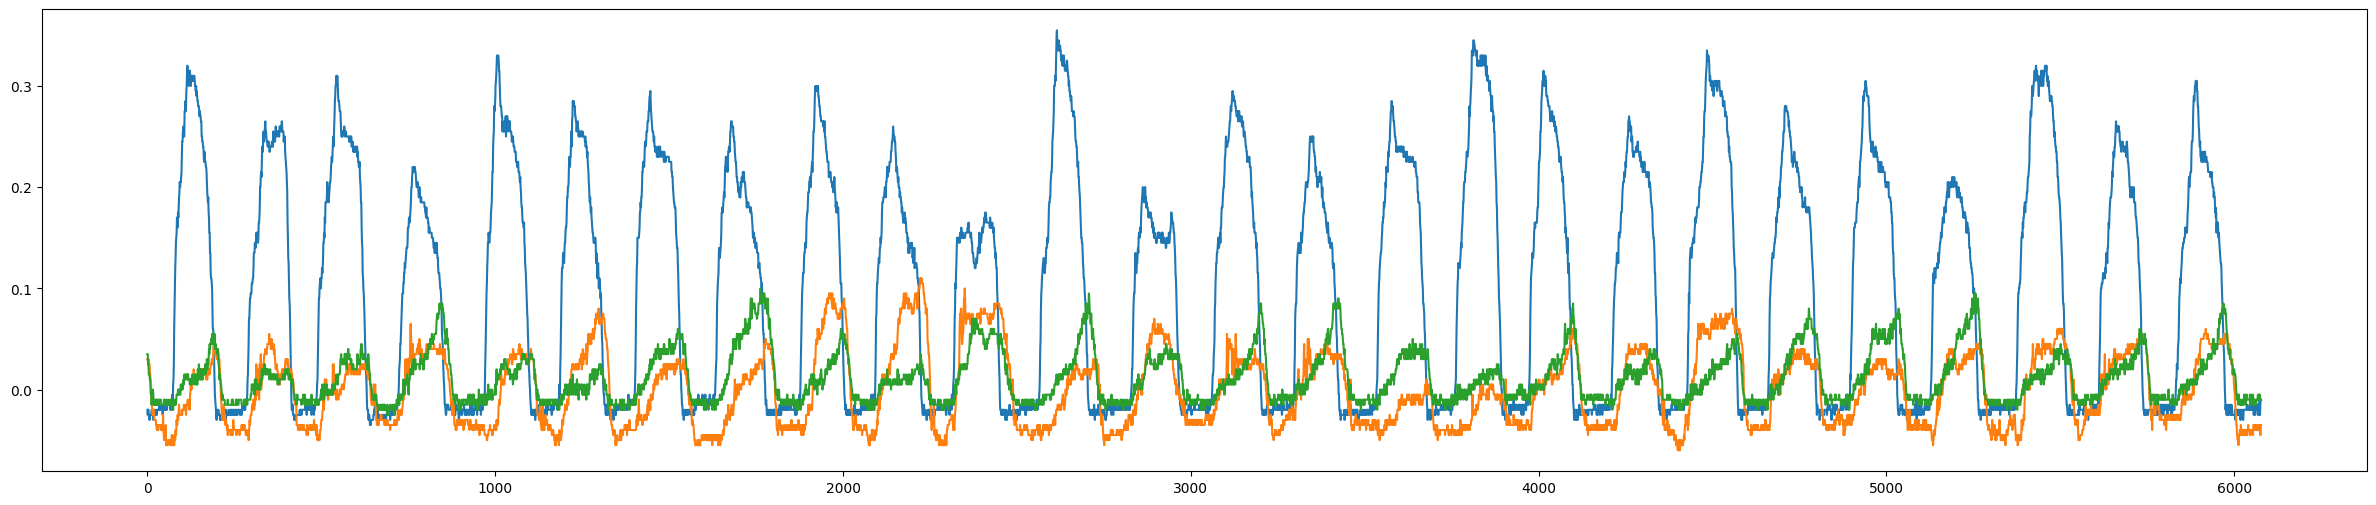

In [ ]:
plt.figure(figsize = (30, 6))
plt.plot(df_S1_I0['Heel'])
plt.plot(df_S1_I0['Toe_Left'])
plt.plot(df_S1_I0['Toe_Right'])

In [ ]:
# Calculate autocorrelation for each column
autocorr_heel = df_S1_I0['Heel'].autocorr()
autocorr_toe_left = df_S1_I0['Toe_Left'].autocorr()
autocorr_toe_right = df_S1_I0['Toe_Right'].autocorr()

# Find the periodicity by finding the index of the maximum autocorrelation
period_heel = 1 / autocorr_heel
period_toe_left = 1 / autocorr_toe_left
period_toe_right = 1 / autocorr_toe_right

print("Periodicity for Heel:", period_heel)
print("Periodicity for Toe_Left:", period_toe_left)
print("Periodicity for Toe_Right:", period_toe_right)

Periodicity for Heel: 1.0017510039168915
Periodicity for Toe_Left: 1.0111480340344012
Periodicity for Toe_Right: 1.019231061057193


In [ ]:
df_S1_I0 = df_S1_I0.dropna()

In [ ]:
df_S1_I0

,Heel,Toe_Left,Toe_Right
0,-0.020,0.030,0.035
1,-0.025,0.030,0.035
2,-0.020,0.025,0.025
3,-0.020,0.030,0.025
4,-0.025,0.030,0.015
...,...,...,...
6073,-0.010,-0.035,-0.005
6074,-0.025,-0.035,-0.010
6075,-0.015,-0.045,-0.010
6076,-0.010,-0.035,-0.010


In [ ]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize

def find_extrema(data, fit_order, around=5):
    def polynomial_fit(coeffs, x):
        return sum(c * x**i for i, c in enumerate(coeffs))

    def objective(coeffs):
        def fn(x):
            return polynomial_fit(coeffs, x)

        extrema = minimize(fn, x0=0).x
        signs = np.sign(np.gradient(np.gradient(fn(extrema), extrema)))
        ext_points = []
        for i, x in enumerate(extrema):
            closest_indices = np.argsort(np.abs(np.arange(len(data)) - x))[:around]
            closest_points = data.iloc[closest_indices]
            closest_signs = signs[i] * np.ones_like(closest_points.values[:, 0])
            ext_points.append(sorted(zip(closest_points.values[:, 0], closest_points.values[:, 1], closest_points.values[:, 2], closest_signs), key=lambda p: p[1])[0][:3])
        return sum(ext_points, [])

    init_coeffs = np.zeros(fit_order + 1)
    coeffs = minimize(objective, x0=init_coeffs).x

    extrema = objective(coeffs)
    return [(i, heel, toe_left, toe_right) for i, heel, toe_left, toe_right in sorted(extrema, key=lambda p: p[0])]

# Example usage:
# data = pd.DataFrame({
#     'Heel': [0, 1, 2, 3, 4],
#     'Toe_Left': [0, 1, 2, 1, 0],
#     'Toe_Right': [0, -1, -2, -1, 0]
# })

maximas_minimas = find_extrema(df_S1_I0, fit_order=2, around=2)
print("Maximas and minimas:")
for idx, heel, toe_left, toe_right in maximas_minimas:
    print(f"Index: {idx}, Heel: {heel}, Toe_Left: {toe_left}, Toe_Right: {toe_right}")


IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
! pip install PyWavelets -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 43.2 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/pywt/_cwt.py:117: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  wavelet = DiscreteContinuousWavelet(wavelet)
/usr/local/lib/python3.10/dist-packages/scipy/signal/_peak_finding.py:266: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


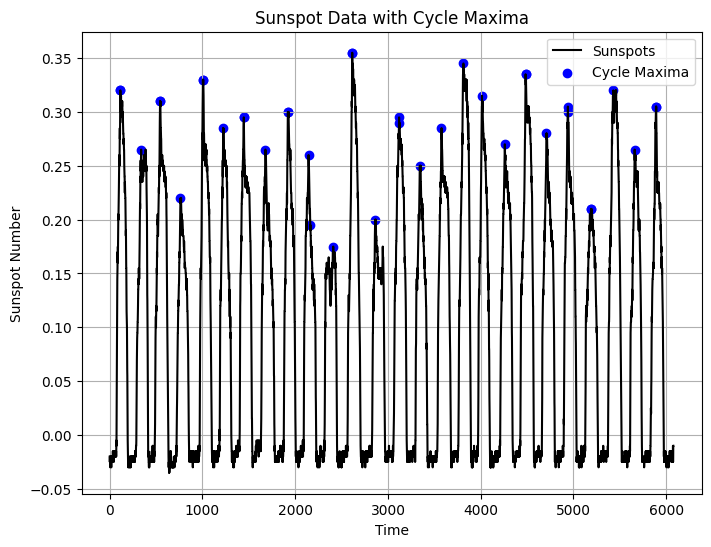

In [ ]:
import numpy as np
import pandas as pd
import pywt
from scipy.signal import find_peaks

def peak_cycle(data_series, search_frac=0.02):
    data = data_series.values  # Convert DataFrame column to numpy array

    # Continuous wavelet transform
    wavelet = 'cmor'  # Complex Morlet wavelet
    widths = np.arange(1, len(data) + 1)
    cwtmatr, _ = pywt.cwt(data, widths, wavelet)

    # Find peaks in the CWT matrix
    peaks, _ = find_peaks(cwtmatr.max(axis=0), distance=int(search_frac * len(data)))

    new_peak_times = []
    for peak in peaks:
        # Define search range
        search_range = slice(max(peak - int(search_frac * len(data)), 0),
                             min(peak + int(search_frac * len(data)), len(data)))

        # Find index of maximum value in search range
        max_index = search_range.start + np.argmax(data[search_range])

        new_peak_times.append(max_index)

    return np.array(new_peak_times)

# Example usage:
# Assuming you have a DataFrame named df with a column 'sunspots'
peak_indices = peak_cycle(df_S1_I0['Heel'])

# Plotting (using matplotlib)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(df_S1_I0.index, df_S1_I0['Heel'], color='black', label='Sunspots')
plt.scatter(df_S1_I0.index[peak_indices], df_S1_I0['Heel'].iloc[peak_indices], color='blue', marker='o', label='Cycle Maxima')
plt.xlabel('Time')
plt.ylabel('Sunspot Number')
plt.title('Sunspot Data with Cycle Maxima')
plt.legend()

plt.grid(True)
plt.show()


In [ ]:
peak_indices

array([ 115,  115,  339,  543,  543,  763, 1005, 1005, 1223, 1446, 1446,
       1678, 1921, 1921, 2144, 2164, 2409, 2615, 2615, 2862, 3120, 3121,
       3343, 3577, 3812, 4014, 4260, 4484, 4484, 4708, 4939, 4940, 5189,
       5189, 5430, 5660, 5889, 5889])

/usr/local/lib/python3.10/dist-packages/pywt/_cwt.py:121: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  wavelet = DiscreteContinuousWavelet(wavelet)
/usr/local/lib/python3.10/dist-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


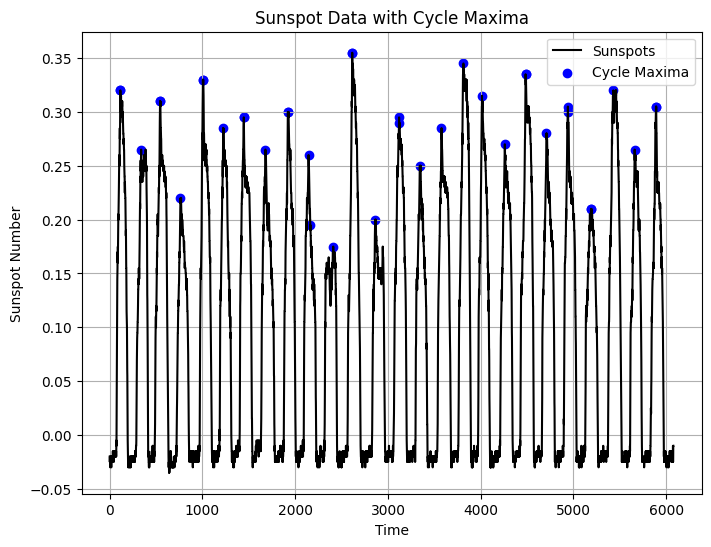

In [ ]:
import numpy as np
import pandas as pd
import pywt
from scipy.signal import find_peaks

def peak_cycle(data_series, search_frac=0.02):
    data = data_series.values  # Convert DataFrame column to numpy array

    # Continuous wavelet transform
    wavelet = 'cmor'  # Complex Morlet wavelet
    widths = np.arange(1, len(data) + 1)
    cwtmatr, _ = pywt.cwt(data, widths, wavelet)

    # Find peaks in the CWT matrix
    peaks, _ = find_peaks(cwtmatr.max(axis=0), distance=int(search_frac * len(data)))

    new_peak_times = []
    for peak in peaks:
        # Define search range
        search_range = slice(max(peak - int(search_frac * len(data)), 0),
                             min(peak + int(search_frac * len(data)), len(data)))

        # Find index of maximum value in search range
        max_index = search_range.start + np.argmax(data[search_range])

        new_peak_times.append(max_index)

    return np.array(new_peak_times)

# Example usage:
# Assuming you have a DataFrame named df with a column 'sunspots'
peak_indices_1 = peak_cycle(df_S1_I0['Toe_Left'])

# Plotting (using matplotlib)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(df_S1_I0.index, df_S1_I0['Heel'], color='black', label='Sunspots')
plt.scatter(df_S1_I0.index[peak_indices], df_S1_I0['Heel'].iloc[peak_indices], color='blue', marker='o', label='Cycle Maxima')
plt.xlabel('Time')
plt.ylabel('Sunspot Number')
plt.title('Sunspot Data with Cycle Maxima')
plt.legend()
plt.grid(True)
plt.show()


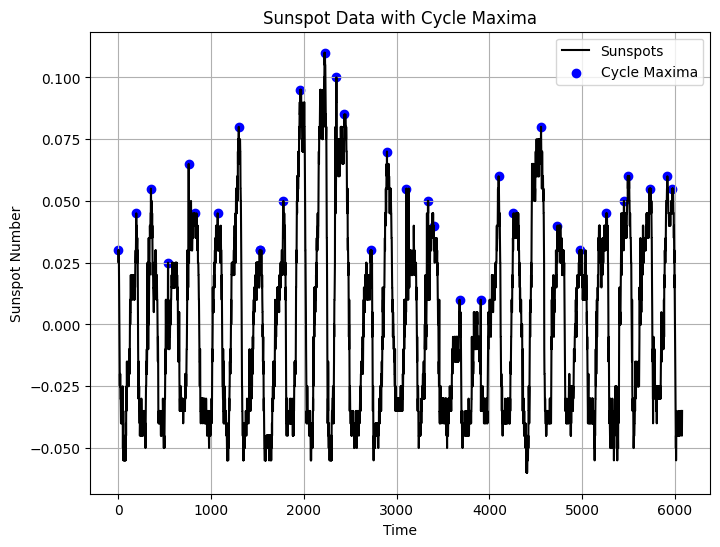

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(df_S1_I0.index, df_S1_I0['Toe_Left'], color='black', label='Sunspots')
plt.scatter(df_S1_I0.index[peak_indices_1], df_S1_I0['Toe_Left'].iloc[peak_indices_1], color='blue', marker='o', label='Cycle Maxima')
plt.xlabel('Time')
plt.ylabel('Sunspot Number')
plt.title('Sunspot Data with Cycle Maxima')
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/pywt/_cwt.py:121: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  wavelet = DiscreteContinuousWavelet(wavelet)
/usr/local/lib/python3.10/dist-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


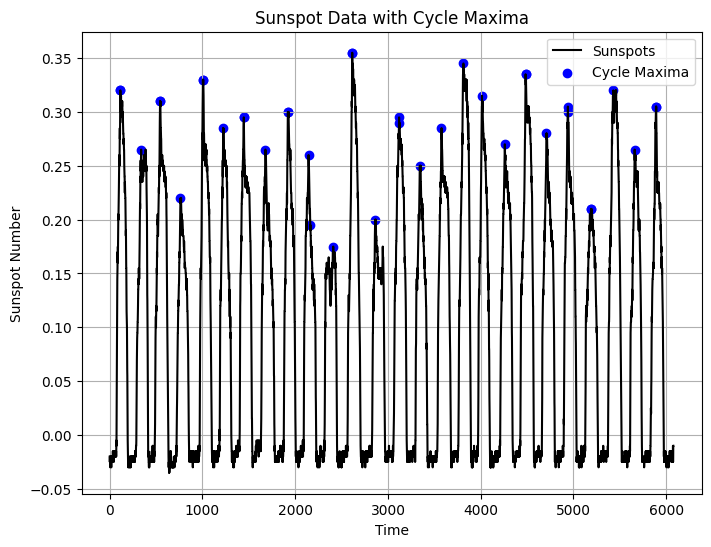

In [ ]:
import numpy as np
import pandas as pd
import pywt
from scipy.signal import find_peaks

def peak_cycle(data_series, search_frac=0.02):
    data = data_series.values  # Convert DataFrame column to numpy array

    # Continuous wavelet transform
    wavelet = 'cmor'  # Complex Morlet wavelet
    widths = np.arange(1, len(data) + 1)
    cwtmatr, _ = pywt.cwt(data, widths, wavelet)

    # Find peaks in the CWT matrix
    peaks, _ = find_peaks(cwtmatr.max(axis=0), distance=int(search_frac * len(data)))

    new_peak_times = []
    for peak in peaks:
        # Define search range
        search_range = slice(max(peak - int(search_frac * len(data)), 0),
                             min(peak + int(search_frac * len(data)), len(data)))

        # Find index of maximum value in search range
        max_index = search_range.start + np.argmax(data[search_range])

        new_peak_times.append(max_index)

    return np.array(new_peak_times)

# Example usage:
# Assuming you have a DataFrame named df with a column 'sunspots'
peak_indices_2 = peak_cycle(df_S1_I0['Toe_Right'])

# Plotting (using matplotlib)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(df_S1_I0.index, df_S1_I0['Heel'], color='black', label='Sunspots')
plt.scatter(df_S1_I0.index[peak_indices], df_S1_I0['Heel'].iloc[peak_indices], color='blue', marker='o', label='Cycle Maxima')
plt.xlabel('Time')
plt.ylabel('Sunspot Number')
plt.title('Sunspot Data with Cycle Maxima')
plt.legend()
plt.grid(True)
plt.show()


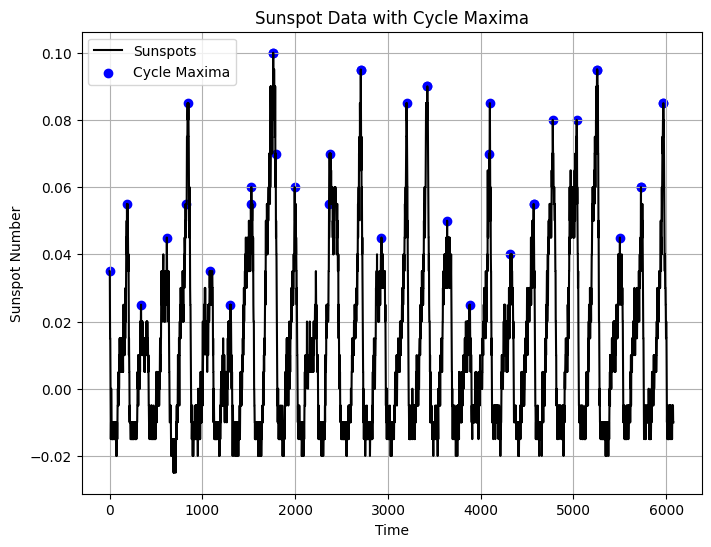

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(df_S1_I0.index, df_S1_I0['Toe_Right'], color='black', label='Sunspots')
plt.scatter(df_S1_I0.index[peak_indices_2], df_S1_I0['Toe_Right'].iloc[peak_indices_2], color='blue', marker='o', label='Cycle Maxima')
plt.xlabel('Time')
plt.ylabel('Sunspot Number')
plt.title('Sunspot Data with Cycle Maxima')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import pywt
from scipy.signal import find_peaks

def peak_cycle(data, search_frac=0.02):
    # Continuous wavelet transform
    wavelet = 'cmor'  # Complex Morlet wavelet
    widths = np.arange(1, len(data) + 1)
    cwtmatr, _ = pywt.cwt(data, widths, wavelet)

    # Find peaks in the CWT matrix
    peaks, _ = find_peaks(cwtmatr.max(axis=0), distance=int(search_frac * len(data)))

    new_peak_times = []
    for peak in peaks:
        # Define search range
        search_range = slice(max(peak - int(search_frac * len(data)), 0),
                             min(peak + int(search_frac * len(data)), len(data)))

        # Find index of maximum value in search range
        max_index = search_range.start + np.argmax(data[search_range])

        new_peak_times.append(max_index)

    return np.array(new_peak_times)

# Example usage:
sunspots = np.loadtxt('sunspots.txt')  # Load your sunspot data here
peak_indices = peak_cycle(sunspots)

# Plotting (using matplotlib)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(np.arange(len(sunspots)), sunspots, color='black', label='Sunspots')
plt.scatter(peak_indices, sunspots[peak_indices], color='blue', marker='o', label='Cycle Maxima')
plt.xlabel('Time')
plt.ylabel('Sunspot Number')
plt.title('Sunspot Data with Cycle Maxima')
plt.legend()
plt.grid(True)
plt.show()


FileNotFoundError: sunspots.txt not found.

In [ ]:
# Normalize
def Normalize(df):
  for col in df.columns:
    df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

  return df

df_S1_I0 = Normalize(df_S1_I0)
df_S1_I5 = Normalize(df_S1_I5)
df_S1_I10 = Normalize(df_S1_I10)
df_S3_I0 = Normalize(df_S3_I0)
df_S3_I5 = Normalize(df_S3_I5)
df_S3_I10 = Normalize(df_S3_I10)
df_S5_I0 = Normalize(df_S5_I0)
df_S5_I5 = Normalize(df_S5_I5)
df_S5_I10 = Normalize(df_S5_I10)

In [ ]:
# import pandas as pd
# import numpy as np

# # Assuming you have your original dataframe named 'df'

# # Define sliding window size
# window_size = 10  # You can adjust this according to your data

# # Define feature extraction functions
# def std(x):
#     return np.std(x)

# def mav(x):
#     return np.mean(np.abs(x))

# def maximum(x):
#     return np.max(x)

# def minimum(x):
#     return np.min(x)

# def median(x):
#     return np.median(x)

# # Define a function to apply sliding window and extract features
# def extract_features(data, window_size):
#     features = []
#     for i in range(len(data) - window_size + 1):
#         window = data[i:i+window_size]
#         feature_vector = [
#             std(window),
#             mav(window),
#             maximum(window),
#             minimum(window),
#             median(window)
#         ]
#         features.append(feature_vector)
#     return features

# # Extract features for each column
# heel_features = extract_features(df_S1_I0['Heel'], window_size)
# toe_left_features = extract_features(df_S1_I0['Toe_Left'], window_size)
# toe_right_features = extract_features(df_S1_I0['Toe_Right'], window_size)

# # Create a new dataframe for extracted features
# features_df_S1_I0 = pd.DataFrame({
#     'Heel_STD': [f[0] for f in heel_features],
#     'Heel_MAV': [f[1] for f in heel_features],
#     'Heel_MAX': [f[2] for f in heel_features],
#     'Heel_MIN': [f[3] for f in heel_features],
#     'Heel_MED': [f[4] for f in heel_features],
#     'Toe_Left_STD': [f[0] for f in toe_left_features],
#     'Toe_Left_MAV': [f[1] for f in toe_left_features],
#     'Toe_Left_MAX': [f[2] for f in toe_left_features],
#     'Toe_Left_MIN': [f[3] for f in toe_left_features],
#     'Toe_Left_MED': [f[4] for f in toe_left_features],
#     'Toe_Right_STD': [f[0] for f in toe_right_features],
#     'Toe_Right_MAV': [f[1] for f in toe_right_features],
#     'Toe_Right_MAX': [f[2] for f in toe_right_features],
#     'Toe_Right_MIN': [f[3] for f in toe_right_features],
#     'Toe_Right_MED': [f[4] for f in toe_right_features]
# })


## Feature Extraction

In [ ]:
dfs = {
    'df_S1_I0':df_S1_I0,
    'df_S1_I5':df_S1_I5,
    'df_S1_I10':df_S1_I10,
    'df_S3_I0':df_S3_I0,
    'df_S3_I5':df_S3_I5,
    'df_S3_I10':df_S3_I10,
    'df_S5_I0':df_S5_I0,
    'df_S5_I5':df_S5_I5,
    'df_S5_I10':df_S5_I10
}

In [ ]:
import pandas as pd
import numpy as np

# Define sliding window size
window_size = 25  # You can adjust this according to your data

# Define feature extraction functions
def std(x):
    return np.std(x)

def mav(x):
    return np.mean(np.abs(x))

def maximum(x):
    return np.max(x)

def minimum(x):
    return np.min(x)

def median(x):
    return np.median(x)

# Define a function to apply sliding window and extract features
def extract_features(data, window_size):
    features = []
    for i in range(len(data) - window_size + 1):
        window = data[i:i+window_size]
        feature_vector = [
            std(window),
            mav(window),
            maximum(window),
            minimum(window),
            median(window)
        ]
        features.append(feature_vector)
    return features

# Define a function to extract features for a dataframe
def extract_features_dataframe(df, window_size):
    features = {}
    for column in df.columns:
        column_features = extract_features(df[column], window_size)
        feature_names = [f'{column}_{stat}' for stat in ['STD', 'MAV', 'MAX', 'MIN', 'MED']]
        for i, feature_name in enumerate(feature_names):
            features[feature_name] = [f[i] for f in column_features]
    features_df = pd.DataFrame(features)
    return features_df

# Extract features for each dataframe
for df_name, df in dfs.items():
    feature_df_name = f'feature_{df_name}'
    features_df = extract_features_dataframe(df, window_size)
    globals()[feature_df_name] = features_df  # Create a dataframe with a dynamic name using globals()


In [ ]:
feature_df_S1_I0['Label'] = 0
feature_df_S1_I5['Label'] = 1
feature_df_S1_I10['Label'] = 2
feature_df_S3_I0['Label'] = 3
feature_df_S3_I5['Label'] = 4
feature_df_S3_I10['Label'] = 5
feature_df_S5_I0['Label'] = 6
feature_df_S5_I5['Label'] = 7
feature_df_S5_I10['Label'] = 8

In [ ]:
dfs_lst = [feature_df_S1_I0, feature_df_S1_I5, feature_df_S1_I10, feature_df_S3_I0, feature_df_S3_I5, feature_df_S3_I10, feature_df_S5_I0,
           feature_df_S5_I5, feature_df_S5_I10]

# Concatenate the DataFrames
df_final = pd.concat(dfs_lst, ignore_index=True)

# If you want to concatenate along axis=1 (columns), you can set axis=1:
# concatenated_df = pd.concat(dfs, axis=1)

# Print the concatenated DataFrame
df_final.head()

,Heel_STD,Heel_MAV,Heel_MAX,Heel_MIN,Heel_MED,Toe_Left_STD,Toe_Left_MAV,Toe_Left_MAX,Toe_Left_MIN,Toe_Left_MED,Toe_Right_STD,Toe_Right_MAV,Toe_Right_MAX,Toe_Right_MIN,Toe_Right_MED,Label
0,0.002828,0.0240,-0.02,-0.03,-0.025,0.023490,0.0224,0.03,-0.030,-0.015,0.016095,0.0138,0.035,-0.015,-0.005,0
1,0.002713,0.0242,-0.02,-0.03,-0.025,0.023267,0.0226,0.03,-0.035,-0.015,0.014854,0.0130,0.035,-0.015,-0.005,0
2,0.002828,0.0240,-0.02,-0.03,-0.025,0.022747,0.0228,0.03,-0.035,-0.020,0.013048,0.0120,0.025,-0.015,-0.010,0
3,0.002713,0.0242,-0.02,-0.03,-0.025,0.022494,0.0234,0.03,-0.040,-0.020,0.012000,0.0116,0.025,-0.015,-0.010,0
4,0.002713,0.0242,-0.02,-0.03,-0.025,0.021554,0.0238,0.03,-0.040,-0.020,0.010480,0.0110,0.015,-0.015,-0.010,0


In [ ]:
df_final['Label'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [ ]:
df_final = df_final.dropna()

In [ ]:
df_final.shape

(54567, 16)

In [ ]:
df_S1_I0.shape

(6079, 3)

In [ ]:
feature_df_S1_I0.shape

(6055, 16)

## Model Implementation

In [ ]:
# Define input shape
input_shape = (1,15)

# Define SAE layers
sae_input = Input(shape=input_shape)
sae_hidden1 = Dense(128, activation='tanh')(sae_input)
sae_hidden2 = Dense(64, activation='tanh')(sae_hidden1)
sae_hidden3 = Dense(32, activation='tanh')(sae_hidden2)

# Define SAE model
sae_model = Model(inputs=sae_input, outputs=sae_hidden3)

# Define BiLSTM layers
bilstm_input = sae_model.output
bilstm1 = Bidirectional(LSTM(128, activation='tanh', return_sequences=True))(bilstm_input)
bilstm2 = Bidirectional(LSTM(64, activation='tanh', return_sequences=False))(bilstm1)

# Define dropout layer
dropout_layer = Dropout(0.5)(bilstm2)

# Define DNN layers
dnn_hidden1 = Dense(64, activation='relu')(dropout_layer)
dnn_hidden2 = Dense(32, activation='relu')(dnn_hidden1)
dnn_output = Dense(9, activation='softmax')(dnn_hidden2)

# Define the full model
full_model = Model(inputs=sae_model.input, outputs=dnn_output)

# Print model summary
full_model.summary()


Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1, 15)]           0         
                                                                 
 dense_18 (Dense)            (None, 1, 128)            2048      
                                                                 
 dense_19 (Dense)            (None, 1, 64)             8256      
                                                                 
 dense_20 (Dense)            (None, 1, 32)             2080      
                                                                 
 bidirectional_6 (Bidirecti  (None, 1, 256)            164864    
 onal)                                                           
                                                                 
 bidirectional_7 (Bidirecti  (None, 128)               164352    
 onal)                                                     

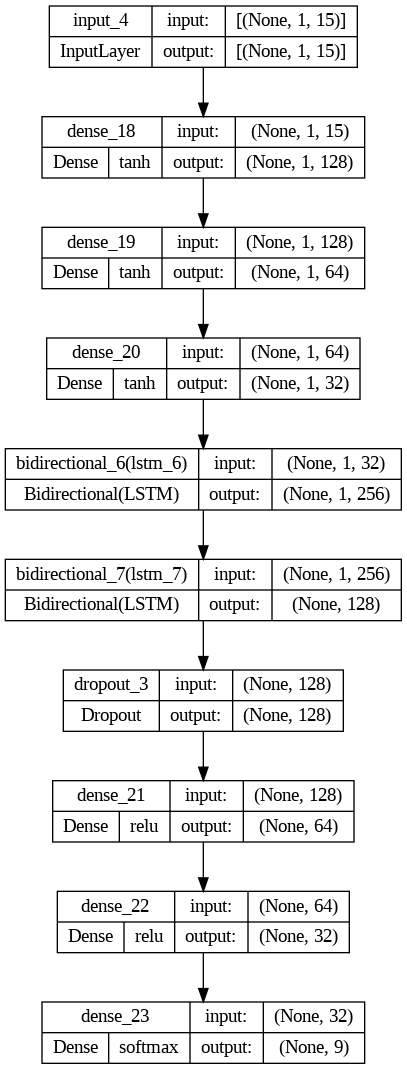

In [ ]:
tf.keras.utils.plot_model(
    full_model,
    to_file='BILSTM.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=True,
    show_trainable=False
)

In [ ]:
df_final.isna().sum()

Heel_STD         0
Heel_MAV         0
Heel_MAX         0
Heel_MIN         0
Heel_MED         9
Toe_Left_STD     0
Toe_Left_MAV     0
Toe_Left_MAX     0
Toe_Left_MIN     0
Toe_Left_MED     9
Toe_Right_STD    0
Toe_Right_MAV    0
Toe_Right_MAX    0
Toe_Right_MIN    0
Toe_Right_MED    9
Label            0
dtype: int64

In [ ]:
df_final = df_final.dropna()

In [ ]:
df_final.isna().sum()

Heel_STD         0
Heel_MAV         0
Heel_MAX         0
Heel_MIN         0
Heel_MED         0
Toe_Left_STD     0
Toe_Left_MAV     0
Toe_Left_MAX     0
Toe_Left_MIN     0
Toe_Left_MED     0
Toe_Right_STD    0
Toe_Right_MAV    0
Toe_Right_MAX    0
Toe_Right_MIN    0
Toe_Right_MED    0
Label            0
dtype: int64

In [ ]:
print(full_model.output_shape)

(None, 9)


In [ ]:
# Compile the model
full_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])# save best model
checkpoint = ModelCheckpoint(filepath = 'SBLSTM.h5', verbose = 1, save_best_only=True)
callbacks = [checkpoint]

### Train Test split

In [ ]:
X = df_final.drop(columns=['Label']).values
y = df_final['Label'].values

# Encode target labels
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42, stratify = y)

In [ ]:
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

### Model Training

In [ ]:
from datetime import datetime

start = datetime.now()

# Train the model
history = full_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose = 1, callbacks = callbacks)

duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
1090/1092 [============================>.] - ETA: 0s - loss: 1.2574 - accuracy: 0.4990
Epoch 1: val_loss improved from inf to 1.11834, saving model to SBLSTM.h5
1092/1092 [==============================] - 26s 16ms/step - loss: 1.2575 - accuracy: 0.4990 - val_loss: 1.1183 - val_accuracy: 0.5542
Epoch 2/100
1087/1092 [============================>.] - ETA: 0s - loss: 1.1226 - accuracy: 0.5553
Epoch 2: val_loss improved from 1.11834 to 1.03358, saving model to SBLSTM.h5
1092/1092 [==============================] - 13s 12ms/step - loss: 1.1220 - accuracy: 0.5555 - val_loss: 1.0336 - val_accuracy: 0.5924
Epoch 3/100
1088/1092 [============================>.] - ETA: 0s - loss: 1.0223 - accuracy: 0.6011
Epoch 3: val_loss improved from 1.03358 to 0.94939, saving model to SBLSTM.h5
1092/1092 [==============================] - 13s 12ms/step - loss: 1.0223 - accuracy: 0.6011 - val_loss: 0.9494 - val_accuracy: 0.6350
Epoch 4/100
1091/1092 [============================>.] - ETA: 0s - l

In [ ]:
from tensorflow.keras.models import load_model

# Load the best model
SBLSTM = load_model('/content/SBLSTM.h5')

In [ ]:
# Evaluate the model
loss, accuracy = SBLSTM.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

342/342 [==============================] - 4s 5ms/step - loss: 0.1170 - accuracy: 0.9574
Test Loss: 0.11701928079128265, Test Accuracy: 0.9573941826820374


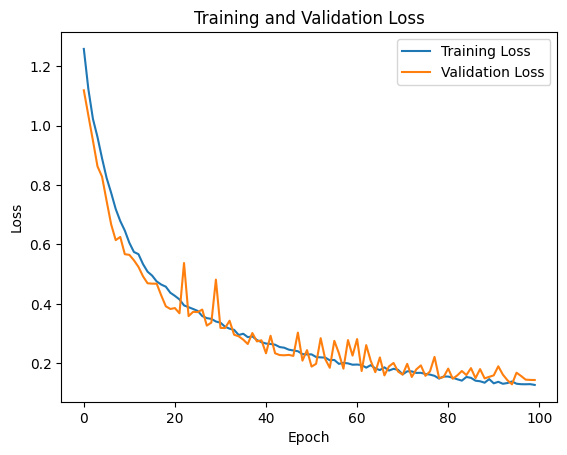

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation loss curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

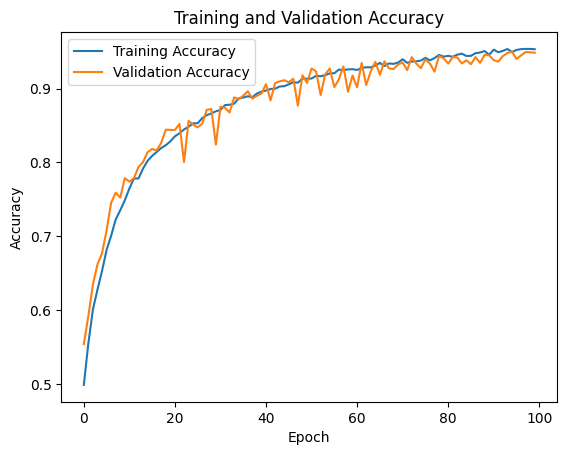

In [ ]:
# Plot training and validation accuracy curves
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Model Testing

In [ ]:
label_mapping = {
    0: 'Speed 1 Inclination 0',
    1: 'Speed 1 Inclination 5',
    2: 'Speed 1 Inclination 10',
    3: 'Speed 3 Inclination 0',
    4: 'Speed 3 Inclination 5',
    5: 'Speed 3 Inclination 10',
    6: 'Speed 5 Inclination 0',
    7: 'Speed 5 Inclination 5',
    8: 'Speed 5 Inclination 10',
}

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Assuming you have trained and tested your BSLTM model already
# Use the trained model to predict on test data
y_pred = SBLSTM.predict(X_test)

# Convert predictions back to labels
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# Generate classification report
print("Classification Report:")
print(classification_report(y_true_labels, y_pred_labels, target_names=label_mapping.values()))

342/342 [==============================] - 2s 6ms/step
Classification Report:
                        precision    recall  f1-score   support

 Speed 1 Inclination 0       0.94      0.97      0.96      1211
 Speed 1 Inclination 5       0.97      0.94      0.95      1172
Speed 1 Inclination 10       0.96      0.97      0.96      1203
 Speed 3 Inclination 0       0.97      0.98      0.97      1275
 Speed 3 Inclination 5       0.96      0.93      0.95      1227
Speed 3 Inclination 10       0.97      0.96      0.97      1204
 Speed 5 Inclination 0       0.94      0.94      0.94      1203
 Speed 5 Inclination 5       0.94      0.96      0.95      1220
Speed 5 Inclination 10       0.96      0.96      0.96      1199

              accuracy                           0.96     10914
             macro avg       0.96      0.96      0.96     10914
          weighted avg       0.96      0.96      0.96     10914



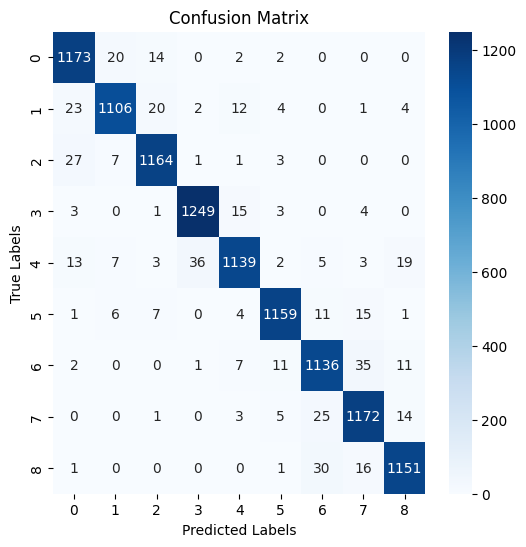

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get the confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
SBLSTM.save('/content/drive/MyDrive/BTP_2/SBLSTM.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Classical Models

In [ ]:
X = df_final.drop(columns=['Label']).values
y = df_final['Label'].values

# Encode target labels
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
# y_categorical = to_categorical(y_encoded)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify = y)

In [ ]:
y_encoded

array([0, 0, 0, ..., 8, 8, 8])

Training Logistic Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(



Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.27      0.12      0.17      1211
           1       0.23      0.31      0.26      1172
           2       0.30      0.26      0.28      1203
           3       0.37      0.54      0.44      1275
           4       0.28      0.19      0.23      1227
           5       0.35      0.46      0.40      1204
           6       0.24      0.24      0.24      1203
           7       0.36      0.43      0.39      1220
           8       0.37      0.25      0.30      1199

    accuracy                           0.31     10914
   macro avg       0.31      0.31      0.30     10914
weighted avg       0.31      0.31      0.30     10914


Confusion Matrix for Logistic Regression:



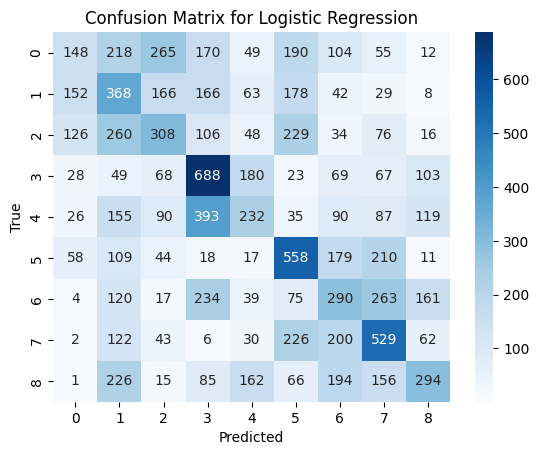

Training Random Forest...

Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1211
           1       1.00      1.00      1.00      1172
           2       1.00      1.00      1.00      1203
           3       1.00      1.00      1.00      1275
           4       1.00      1.00      1.00      1227
           5       0.99      1.00      1.00      1204
           6       0.99      1.00      1.00      1203
           7       1.00      1.00      1.00      1220
           8       1.00      1.00      1.00      1199

    accuracy                           1.00     10914
   macro avg       1.00      1.00      1.00     10914
weighted avg       1.00      1.00      1.00     10914


Confusion Matrix for Random Forest:



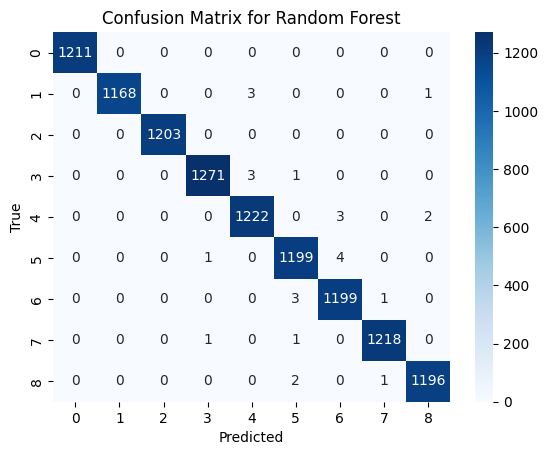

Training XGBoost...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:57:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Classification Report for XGBoost:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1211
           1       1.00      1.00      1.00      1172
           2       1.00      1.00      1.00      1203
           3       1.00      1.00      1.00      1275
           4       1.00      1.00      1.00      1227
           5       1.00      1.00      1.00      1204
           6       1.00      1.00      1.00      1203
           7       1.00      1.00      1.00      1220
           8       1.00      1.00      1.00      1199

    accuracy                           1.00     10914
   macro avg       1.00      1.00      1.00     10914
weighted avg       1.00      1.00      1.00     10914


Confusion Matrix for XGBoost:



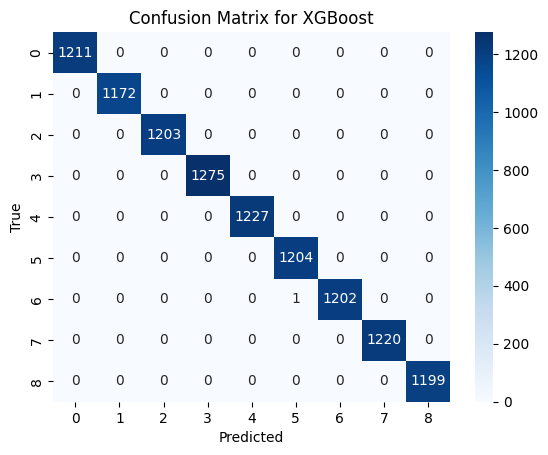

Training LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007974 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3473
[LightGBM] [Info] Number of data points in the train set: 43653, number of used features: 15
[LightGBM] [Info] Start training from score -2.198738
[LightGBM] [Info] Start training from score -2.230626
[LightGBM] [Info] Start training from score -2.205575
[LightGBM] [Info] Start training from score -2.147228
[LightGBM] [Info] Start training from score -2.185405
[LightGBM] [Info] Start training from score -2.204536
[LightGBM] [Info] Start training from score -2.205575
[LightGBM] [Info] Start training from score -2.191127
[LightGBM] [Info] Start training from score -2.208281

Classification Report for LightGBM:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1211
           1       1.00      1.00      1.00      1172
   

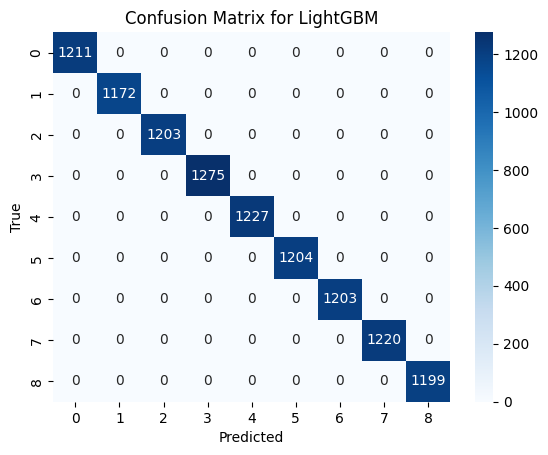

Training KNN...

Classification Report for KNN:

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1211
           1       0.95      0.95      0.95      1172
           2       0.96      0.97      0.96      1203
           3       0.93      0.95      0.94      1275
           4       0.91      0.87      0.89      1227
           5       0.94      0.93      0.94      1204
           6       0.87      0.91      0.89      1203
           7       0.92      0.91      0.92      1220
           8       0.92      0.91      0.92      1199

    accuracy                           0.93     10914
   macro avg       0.93      0.93      0.93     10914
weighted avg       0.93      0.93      0.93     10914


Confusion Matrix for KNN:



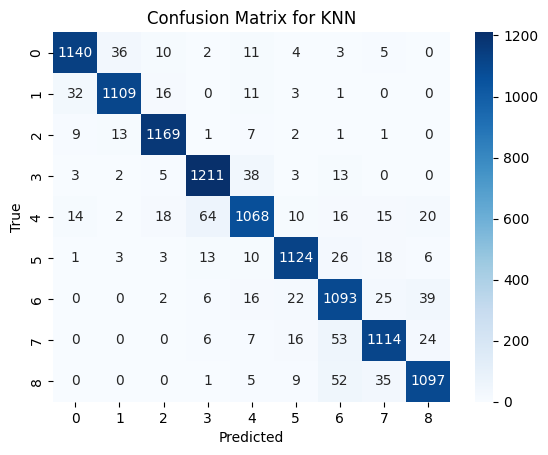

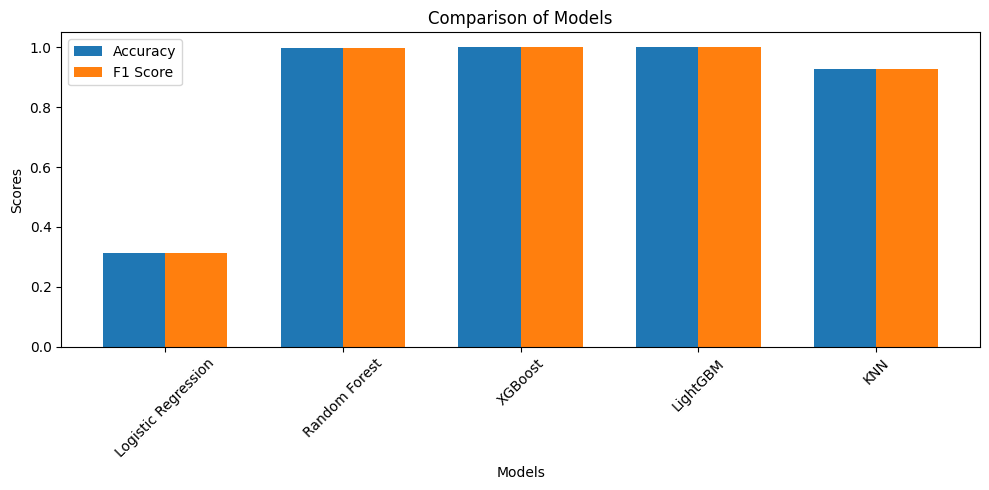

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_train, X_test, y_train, y_test are pre-split datasets
# Replace these with your actual train-test data
# X_train, X_test, y_train, y_test = ...

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500, multi_class='ovr', solver='lbfgs'),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

# Dictionary to store performance metrics
metrics = {
    "Model": [],
    "Accuracy": [],
    "F1 Score": []
}

# Train and evaluate each model
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='micro')  # Use 'macro' if you want to give equal weight to all classes

    # Append metrics
    metrics["Model"].append(name)
    metrics["Accuracy"].append(acc)
    metrics["F1 Score"].append(f1)

    # Print classification report and confusion matrix
    print(f"\nClassification Report for {name}:\n")
    print(classification_report(y_test, y_pred))

    print(f"\nConfusion Matrix for {name}:\n")
    cm = confusion_matrix(y_test, y_pred)  # If y_test and y_pred are one-hot encoded
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Create a DataFrame for the metrics
metrics_df = pd.DataFrame(metrics)

# Plot the metrics
plt.figure(figsize=(10, 5))
bar_width = 0.35
index = np.arange(len(metrics["Model"]))

# Accuracy plot
plt.bar(index, metrics_df["Accuracy"], bar_width, label="Accuracy")

# F1 Score plot
plt.bar(index + bar_width, metrics_df["F1 Score"], bar_width, label="F1 Score")

plt.xlabel("Models")
plt.ylabel("Scores")
plt.title("Comparison of Models")
plt.xticks(index + bar_width / 2, metrics_df["Model"], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


## CNN based

In [ ]:
# import numpy as np
# import pandas as pd
# from scipy.stats import skew, kurtosis

# def extract_features(data, window_size=25, stride=1):
#     features = []
#     for start in range(0, len(data) - window_size + 1, stride):
#         window = data[start:start + window_size]
#         feature_dict = {
#             'mean': np.mean(window),
#             'median': np.median(window),
#             'std': np.std(window),
#             'min': np.min(window),
#             'max': np.max(window),
#             'skewness': skew(window),
#             'kurtosis': kurtosis(window),
#             'rms': np.sqrt(np.mean(np.square(window))),
#             'iqr': np.percentile(window, 75) - np.percentile(window, 25),
#         }
#         features.append(feature_dict)
#     return pd.DataFrame(features)

In [ ]:
# window_size = 25
# stride=1

# # Extract features for each dataframe
# for df_name, df in dfs.items():
#     feature_df_name = f'feature_{df_name}'
#     features_df = extract_features(df, window_size, stride)
#     globals()[feature_df_name] = features_df  # Create a dataframe with a dynamic name using globals()

In [ ]:
# feature_df_S1_I0['Label'] = 0
# feature_df_S1_I5['Label'] = 1
# feature_df_S1_I10['Label'] = 2
# feature_df_S3_I0['Label'] = 3
# feature_df_S3_I5['Label'] = 4
# feature_df_S3_I10['Label'] = 5
# feature_df_S5_I0['Label'] = 6
# feature_df_S5_I5['Label'] = 7
# feature_df_S5_I10['Label'] = 8

In [ ]:
# dfs_lst = [feature_df_S1_I0, feature_df_S1_I5, feature_df_S1_I10, feature_df_S3_I0, feature_df_S3_I5, feature_df_S3_I10, feature_df_S5_I0,
#            feature_df_S5_I5, feature_df_S5_I10]

# # Concatenate the DataFrames
# df_final = pd.concat(dfs_lst, ignore_index=True)

# # If you want to concatenate along axis=1 (columns), you can set axis=1:
# # concatenated_df = pd.concat(dfs, axis=1)

# # Print the concatenated DataFrame
# df_final.head()

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
y = encoder.fit_transform(df_final[['Label']]).toarray()  # Assuming the target column is named 'target'


In [ ]:
import numpy as np

X = df_final.iloc[:, :-1].values
X_reshaped = X.reshape(X.shape[0], X.shape[1], 1)  # Shape: (num_samples, 15, 1)


In [ ]:
X_reshaped.shape

(54567, 15, 1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, stratify=y, random_state=42)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

def create_cnn(input_shape, num_classes):
    model = Sequential()

    # Input Layer with Convolution
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2))

    # Second Convolution Layer
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2))

    # Flatten and Fully Connected Layers
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))  # Regularization
    model.add(Dense(num_classes, activation='softmax'))  # Output Layer

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Create the model
input_shape = (15, 1)  # 15 features, 1 channel
num_classes = 9
cnn_model = create_cnn(input_shape, num_classes)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = cnn_model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/100
1092/1092 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.3089 - loss: 1.7970 - val_accuracy: 0.4814 - val_loss: 1.2660
Epoch 2/100
1092/1092 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.4919 - loss: 1.2676 - val_accuracy: 0.5756 - val_loss: 1.0795
Epoch 3/100
1092/1092 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5438 - loss: 1.1362 - val_accuracy: 0.5655 - val_loss: 1.0912
Epoch 4/100
1092/1092 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5617 - loss: 1.0899 - val_accuracy: 0.4249 - val_loss: 1.6038
Epoch 5/100
1092/1092 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5800 - loss: 1.0490 - val_accuracy: 0.5086 - val_loss: 1.3053
Epoch 6/100
1092/1092 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5895 - loss: 1.0185 - val_accuracy: 0.6171 - val_loss: 0.9636
Epoch 7/100
1092/1092 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6046 - loss: 0.9912 - val_accuracy: 0.6685 - val_loss: 0.8419
Epoch 8/100
1092/1092 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6115 - loss:

In [ ]:
test_loss, test_accuracy = cnn_model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


342/342 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6945 - loss: 0.7937
Test Accuracy: 69.62%


In [ ]:
from sklearn.metrics import classification_report
import numpy as np

y_pred = cnn_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

print(classification_report(y_test_classes, y_pred_classes))


342/342 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.87      0.59      0.70      1211
           1       0.68      0.67      0.68      1172
           2       0.80      0.83      0.81      1203
           3       0.68      0.78      0.73      1275
           4       0.58      0.65      0.61      1227
           5       0.72      0.60      0.66      1204
           6       0.73      0.83      0.77      1203
           7       0.65      0.54      0.59      1220
           8       0.63      0.77      0.69      1199

    accuracy                           0.70     10914
   macro avg       0.70      0.70      0.69     10914
weighted avg       0.70      0.70      0.69     10914



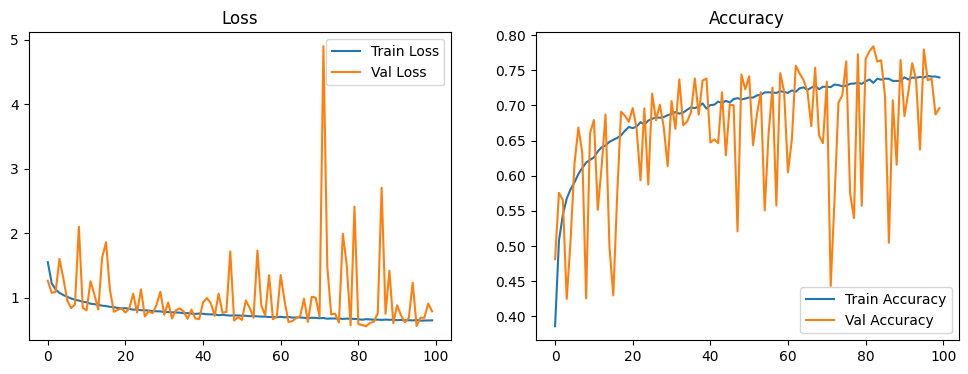

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.legend()

plt.show()


## Testing over other subject data

### Rishabh


In [ ]:
Rdf_S1_I0 = pd.read_csv('/content/drive/MyDrive/BTP_2/FSR_prep/Rishabh/Walk_S1_I0.txt')
Rdf_S1_I5 = pd.read_csv('/content/drive/MyDrive/BTP_2/FSR_prep/Rishabh/Walk_S1_I5.txt')
Rdf_S1_I10 = pd.read_csv('/content/drive/MyDrive/BTP_2/FSR_prep/Rishabh/Walk_S1_I10.txt')
Rdf_S3_I0 = pd.read_csv('/content/drive/MyDrive/BTP_2/FSR_prep/Rishabh/Walk_S3_I0.txt')
Rdf_S3_I5 = pd.read_csv('/content/drive/MyDrive/BTP_2/FSR_prep/Rishabh/Walk_S3_I5.txt')
Rdf_S3_I10 = pd.read_csv('/content/drive/MyDrive/BTP_2/FSR_prep/Rishabh/Walk_S3_I10.txt')
Rdf_S5_I0 = pd.read_csv('/content/drive/MyDrive/BTP_2/FSR_prep/Rishabh/Walk_S5_I0.txt')
Rdf_S5_I5 = pd.read_csv('/content/drive/MyDrive/BTP_2/FSR_prep/Rishabh/Walk_S5_I5.txt')
Rdf_S5_I10 = pd.read_csv('/content/drive/MyDrive/BTP_2/FSR_prep/Rishabh/Walk_S5_I10.txt')

In [ ]:
# Normalize
def Normalize(df):
  for col in df.columns:
    df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

  return df

Rdf_S1_I0 = Normalize(Rdf_S1_I0)
Rdf_S1_I5 = Normalize(Rdf_S1_I5)
Rdf_S1_I10 = Normalize(Rdf_S1_I10)
Rdf_S3_I0 = Normalize(Rdf_S3_I0)
Rdf_S3_I5 = Normalize(Rdf_S3_I5)
Rdf_S3_I10 = Normalize(Rdf_S3_I10)
Rdf_S5_I0 = Normalize(Rdf_S5_I0)
Rdf_S5_I5 = Normalize(Rdf_S5_I5)
Rdf_S5_I10 = Normalize(Rdf_S5_I10)

In [ ]:
dfs = {
    'Rdf_S1_I0':Rdf_S1_I0,
    'Rdf_S1_I5':Rdf_S1_I5,
    'Rdf_S1_I10':Rdf_S1_I10,
    'Rdf_S3_I0':Rdf_S3_I0,
    'Rdf_S3_I5':Rdf_S3_I5,
    'Rdf_S3_I10':Rdf_S3_I10,
    'Rdf_S5_I0':Rdf_S5_I0,
    'Rdf_S5_I5':Rdf_S5_I5,
    'Rdf_S5_I10':Rdf_S5_I10
}

In [ ]:
# Extract features for each dataframe
for df_name, df in dfs.items():
    feature_df_name = f'feature_{df_name}'
    features_df = extract_features_dataframe(df, window_size)
    globals()[feature_df_name] = features_df  # Create a dataframe with a dynamic name using globals()

In [ ]:
feature_Rdf_S1_I0['Label'] = 0
feature_Rdf_S1_I5['Label'] = 1
feature_Rdf_S1_I10['Label'] = 2
feature_Rdf_S3_I0['Label'] = 3
feature_Rdf_S3_I5['Label'] = 4
feature_Rdf_S3_I10['Label'] = 5
feature_Rdf_S5_I0['Label'] = 6
feature_Rdf_S5_I5['Label'] = 7
feature_Rdf_S5_I10['Label'] = 8

In [ ]:
dfs_lst = [feature_Rdf_S1_I0, feature_Rdf_S1_I5, feature_Rdf_S1_I10, feature_Rdf_S3_I0, feature_Rdf_S3_I5, feature_Rdf_S3_I10, feature_Rdf_S5_I0,
           feature_Rdf_S5_I5, feature_Rdf_S5_I10]

# Concatenate the DataFrames
Rdf_final = pd.concat(dfs_lst, ignore_index=True)

# If you want to concatenate along axis=1 (columns), you can set axis=1:
# concatenated_df = pd.concat(dfs, axis=1)

# Print the concatenated DataFrame
Rdf_final.head()

,Heel_STD,Heel_MAV,Heel_MAX,Heel_MIN,Heel_MED,Toe_Left_STD,Toe_Left_MAV,Toe_Left_MAX,Toe_Left_MIN,Toe_Left_MED,Toe_Right_STD,Toe_Right_MAV,Toe_Right_MAX,Toe_Right_MIN,Toe_Right_MED,Label
0,0.003260,0.011340,0.015464,0.005155,0.010309,0.01055,0.117931,0.137931,0.103448,0.12069,0.022522,0.103784,0.135135,0.054054,0.108108,0
1,0.003016,0.011546,0.015464,0.005155,0.010309,0.01055,0.117931,0.137931,0.103448,0.12069,0.022522,0.103784,0.135135,0.054054,0.108108,0
2,0.002812,0.011959,0.015464,0.005155,0.010309,0.01055,0.117931,0.137931,0.103448,0.12069,0.022933,0.102703,0.135135,0.054054,0.108108,0
3,0.002812,0.011959,0.015464,0.005155,0.010309,0.01055,0.117931,0.137931,0.103448,0.12069,0.022933,0.102703,0.135135,0.054054,0.108108,0
4,0.002812,0.011959,0.015464,0.005155,0.010309,0.01055,0.117931,0.137931,0.103448,0.12069,0.021997,0.101622,0.135135,0.054054,0.108108,0


In [ ]:
Rdf_final = Rdf_final.dropna()

In [ ]:
X = Rdf_final.drop(columns=['Label']).values
y = Rdf_final['Label'].values

# Encode target labels
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42, stratify = y)

In [ ]:
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
# Define input shape
input_shape = (1,15)

# Define SAE layers
sae_input = Input(shape=input_shape)
sae_hidden1 = Dense(128, activation='tanh')(sae_input)
sae_hidden2 = Dense(64, activation='tanh')(sae_hidden1)
sae_hidden3 = Dense(32, activation='tanh')(sae_hidden2)

# Define SAE model
sae_model = Model(inputs=sae_input, outputs=sae_hidden3)

# Define BiLSTM layers
bilstm_input = sae_model.output
bilstm1 = Bidirectional(LSTM(128, activation='tanh', return_sequences=True))(bilstm_input)
bilstm2 = Bidirectional(LSTM(64, activation='tanh', return_sequences=False))(bilstm1)

# Define dropout layer
dropout_layer = Dropout(0.5)(bilstm2)

# Define DNN layers
dnn_hidden1 = Dense(64, activation='relu')(dropout_layer)
dnn_hidden2 = Dense(32, activation='relu')(dnn_hidden1)
dnn_output = Dense(9, activation='softmax')(dnn_hidden2)

# Define the full model
full_model_R = Model(inputs=sae_model.input, outputs=dnn_output)

# Print model summary
full_model_R.summary()


Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 1, 15)]           0         
                                                                 
 dense_36 (Dense)            (None, 1, 128)            2048      
                                                                 
 dense_37 (Dense)            (None, 1, 64)             8256      
                                                                 
 dense_38 (Dense)            (None, 1, 32)             2080      
                                                                 
 bidirectional_12 (Bidirect  (None, 1, 256)            164864    
 ional)                                                          
                                                                 
 bidirectional_13 (Bidirect  (None, 128)               164352    
 ional)                                                   

In [ ]:
# Compile the model
full_model_R.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])# save best model
checkpoint = ModelCheckpoint(filepath = 'SBLSTM_R.h5', verbose = 1, save_best_only=True)
callbacks = [checkpoint]

In [ ]:
from datetime import datetime

start = datetime.now()

# Train the model
history = full_model_R.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose = 1, callbacks = callbacks)

duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
1109/1112 [============================>.] - ETA: 0s - loss: 1.4255 - accuracy: 0.4299
Epoch 1: val_loss improved from inf to 1.01639, saving model to SBLSTM_R.h5
1112/1112 [==============================] - 22s 13ms/step - loss: 1.4246 - accuracy: 0.4303 - val_loss: 1.0164 - val_accuracy: 0.5874
Epoch 2/100
  12/1112 [..............................] - ETA: 11s - loss: 1.1408 - accuracy: 0.5182

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1109/1112 [============================>.] - ETA: 0s - loss: 0.9412 - accuracy: 0.6235
Epoch 2: val_loss improved from 1.01639 to 0.83467, saving model to SBLSTM_R.h5
1112/1112 [==============================] - 13s 12ms/step - loss: 0.9404 - accuracy: 0.6237 - val_loss: 0.8347 - val_accuracy: 0.6690
Epoch 3/100
1112/1112 [==============================] - ETA: 0s - loss: 0.7937 - accuracy: 0.6852
Epoch 3: val_loss improved from 0.83467 to 0.68878, saving model to SBLSTM_R.h5
1112/1112 [==============================] - 14s 12ms/step - loss: 0.7937 - accuracy: 0.6852 - val_loss: 0.6888 - val_accuracy: 0.7228
Epoch 4/100
1110/1112 [============================>.] - ETA: 0s - loss: 0.7221 - accuracy: 0.7141
Epoch 4: val_loss improved from 0.68878 to 0.67603, saving model to SBLSTM_R.h5
1112/1112 [==============================] - 13s 12ms/step - loss: 0.7220 - accuracy: 0.7141 - val_loss: 0.6760 - val_accuracy: 0.7311
Epoch 5/100
1112/1112 [==============================] - ETA: 0s - los

In [ ]:
from tensorflow.keras.models import load_model

# Load the best model
SBLSTM = load_model('/content/SBLSTM_R.h5')

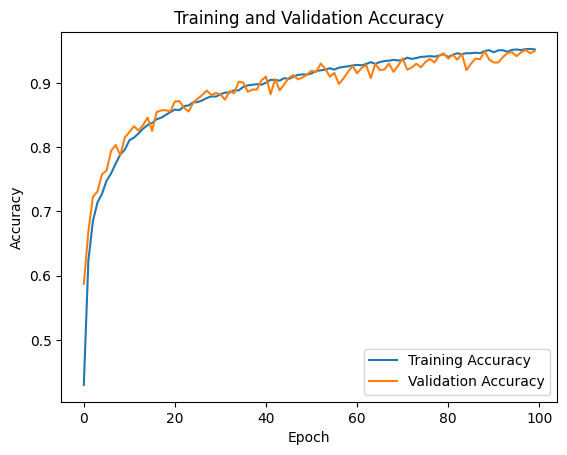

In [ ]:
# Plot training and validation accuracy curves
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

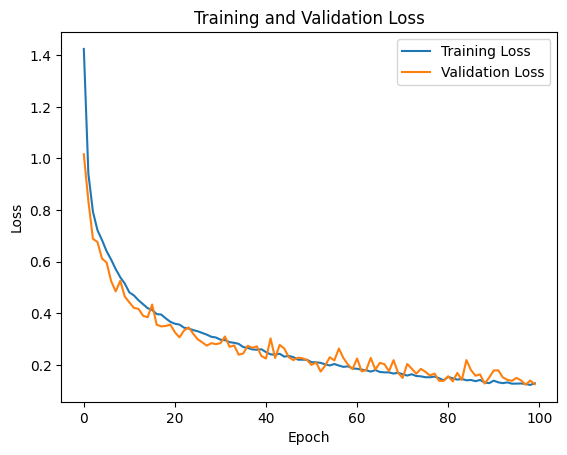

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation loss curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model
loss, accuracy = SBLSTM.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

348/348 [==============================] - 4s 6ms/step - loss: 0.1405 - accuracy: 0.9478
Test Loss: 0.14046718180179596, Test Accuracy: 0.9478229284286499


In [ ]:
label_mapping = {
    0: 'Speed 1 Inclination 0',
    1: 'Speed 1 Inclination 5',
    2: 'Speed 1 Inclination 10',
    3: 'Speed 3 Inclination 0',
    4: 'Speed 3 Inclination 5',
    5: 'Speed 3 Inclination 10',
    6: 'Speed 5 Inclination 0',
    7: 'Speed 5 Inclination 5',
    8: 'Speed 5 Inclination 10',
}

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Assuming you have trained and tested your BSLTM model already
# Use the trained model to predict on test data
y_pred = SBLSTM.predict(X_test)

# Convert predictions back to labels
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# Generate classification report
print("Classification Report:")
print(classification_report(y_true_labels, y_pred_labels, target_names=label_mapping.values()))

348/348 [==============================] - 6s 8ms/step
Classification Report:
                        precision    recall  f1-score   support

 Speed 1 Inclination 0       0.95      0.93      0.94      1297
 Speed 1 Inclination 5       0.90      0.86      0.88      1216
Speed 1 Inclination 10       0.88      0.94      0.91      1271
 Speed 3 Inclination 0       0.98      0.96      0.97      1246
 Speed 3 Inclination 5       0.90      0.95      0.92      1244
Speed 3 Inclination 10       0.97      0.93      0.95      1284
 Speed 5 Inclination 0       0.97      0.99      0.98      1130
 Speed 5 Inclination 5       1.00      0.98      0.99      1201
Speed 5 Inclination 10       1.00      1.00      1.00      1227

              accuracy                           0.95     11116
             macro avg       0.95      0.95      0.95     11116
          weighted avg       0.95      0.95      0.95     11116



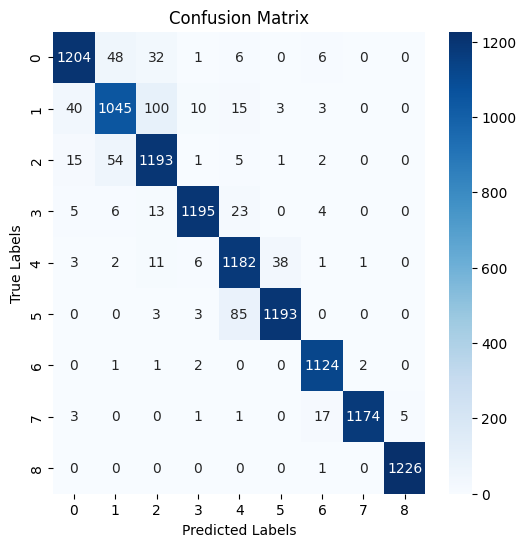

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get the confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### Vidyapati

In [ ]:
Vdf_S1_I0 = pd.read_csv('/content/drive/MyDrive/BTP_2/FSR_prep/Vidyapati/Walk_S1_I0.txt')
Vdf_S1_I5 = pd.read_csv('/content/drive/MyDrive/BTP_2/FSR_prep/Vidyapati/Walk_S1_I5.txt')
Vdf_S1_I10 = pd.read_csv('/content/drive/MyDrive/BTP_2/FSR_prep/Vidyapati/Walk_S1_I10.txt')
Vdf_S3_I0 = pd.read_csv('/content/drive/MyDrive/BTP_2/FSR_prep/Vidyapati/Walk_S3_I0.txt')
Vdf_S3_I5 = pd.read_csv('/content/drive/MyDrive/BTP_2/FSR_prep/Vidyapati/Walk_S3_I5.txt')
Vdf_S3_I10 = pd.read_csv('/content/drive/MyDrive/BTP_2/FSR_prep/Vidyapati/Walk_S3_I10.txt')
Vdf_S5_I0 = pd.read_csv('/content/drive/MyDrive/BTP_2/FSR_prep/Vidyapati/Walk_S5_I0.txt')
Vdf_S5_I5 = pd.read_csv('/content/drive/MyDrive/BTP_2/FSR_prep/Vidyapati/Walk_S5_I5.txt')
Vdf_S5_I10 = pd.read_csv('/content/drive/MyDrive/BTP_2/FSR_prep/Vidyapati/Walk_S5_I10.txt')

In [ ]:
Vdf_S1_I0.shape

(60791, 6)

In [ ]:
def Resample(df):
  start_time = pd.Timestamp(0)  # Replace 'start_date_time' with your actual start time
  time_index = pd.date_range(start=start_time, periods=len(df), freq='1ms')

  # Assign the time index to the DataFrame
  df.index = time_index

  # Resample the data to 100Hz
  resampled_df = df.resample('10ms').mean()
  resampled_df.reset_index(drop=True, inplace=True)

  return resampled_df

Vdf_S1_I0 = Resample(Vdf_S1_I0)
Vdf_S1_I5 = Resample(Vdf_S1_I5)
Vdf_S1_I10 = Resample(Vdf_S1_I10)
Vdf_S3_I0 = Resample(Vdf_S3_I0)
Vdf_S3_I5 = Resample(Vdf_S3_I5)
Vdf_S3_I10 = Resample(Vdf_S3_I10)
Vdf_S5_I0 = Resample(Vdf_S5_I0)
Vdf_S5_I5 = Resample(Vdf_S5_I5)
Vdf_S5_I10 = Resample(Vdf_S5_I10)

In [ ]:
Vdf_S1_I0.shape

(6080, 6)

In [ ]:
# Normalize
def Normalize(df):
  for col in df.columns:
    df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

  return df

Vdf_S1_I0 = Normalize(Vdf_S1_I0)
Vdf_S1_I5 = Normalize(Vdf_S1_I5)
Vdf_S1_I10 = Normalize(Vdf_S1_I10)
Vdf_S3_I0 = Normalize(Vdf_S3_I0)
Vdf_S3_I5 = Normalize(Vdf_S3_I5)
Vdf_S3_I10 = Normalize(Vdf_S3_I10)
Vdf_S5_I0 = Normalize(Vdf_S5_I0)
Vdf_S5_I5 = Normalize(Vdf_S5_I5)
Vdf_S5_I10 = Normalize(Vdf_S5_I10)

In [ ]:
dfs = {
    'Vdf_S1_I0':Vdf_S1_I0,
    'Vdf_S1_I5':Vdf_S1_I5,
    'Vdf_S1_I10':Vdf_S1_I10,
    'Vdf_S3_I0':Vdf_S3_I0,
    'Vdf_S3_I5':Vdf_S3_I5,
    'Vdf_S3_I10':Vdf_S3_I10,
    'Vdf_S5_I0':Vdf_S5_I0,
    'Vdf_S5_I5':Vdf_S5_I5,
    'Vdf_S5_I10':Vdf_S5_I10
}

In [ ]:
import pandas as pd
import numpy as np

# Define sliding window size
window_size = 25  # You can adjust this according to your data

# Define feature extraction functions
def std(x):
    return np.std(x)

def mav(x):
    return np.mean(np.abs(x))

def maximum(x):
    return np.max(x)

def minimum(x):
    return np.min(x)

def median(x):
    return np.median(x)

# Define a function to apply sliding window and extract features
def extract_features(data, window_size):
    features = []
    for i in range(len(data) - window_size + 1):
        window = data[i:i+window_size]
        feature_vector = [
            std(window),
            mav(window),
            maximum(window),
            minimum(window),
            median(window)
        ]
        features.append(feature_vector)
    return features

# Define a function to extract features for a dataframe
def extract_features_dataframe(df, window_size):
    features = {}
    for column in df.columns:
        column_features = extract_features(df[column], window_size)
        feature_names = [f'{column}_{stat}' for stat in ['STD', 'MAV', 'MAX', 'MIN', 'MED']]
        for i, feature_name in enumerate(feature_names):
            features[feature_name] = [f[i] for f in column_features]
    features_df = pd.DataFrame(features)
    return features_df

# Extract features for each dataframe
for df_name, df in dfs.items():
    feature_df_name = f'feature_{df_name}'
    features_df = extract_features_dataframe(df, window_size)
    globals()[feature_df_name] = features_df  # Create a dataframe with a dynamic name using globals()

In [ ]:
feature_Vdf_S1_I0['Label'] = 0
feature_Vdf_S1_I5['Label'] = 1
feature_Vdf_S1_I10['Label'] = 2
feature_Vdf_S3_I0['Label'] = 3
feature_Vdf_S3_I5['Label'] = 4
feature_Vdf_S3_I10['Label'] = 5
feature_Vdf_S5_I0['Label'] = 6
feature_Vdf_S5_I5['Label'] = 7
feature_Vdf_S5_I10['Label'] = 8

In [ ]:
dfs_lst = [feature_Vdf_S1_I0, feature_Vdf_S1_I5, feature_Vdf_S1_I10, feature_Vdf_S3_I0, feature_Vdf_S3_I5, feature_Vdf_S3_I10, feature_Vdf_S5_I0,
           feature_Vdf_S5_I5, feature_Vdf_S5_I10]

# Concatenate the DataFrames
Vdf_final = pd.concat(dfs_lst, ignore_index=True)

# If you want to concatenate along axis=1 (columns), you can set axis=1:
# concatenated_df = pd.concat(dfs, axis=1)

# Print the concatenated DataFrame
Vdf_final.head()

,A_x_STD,A_x_MAV,A_x_MAX,A_x_MIN,A_x_MED,A_y_STD,A_y_MAV,A_y_MAX,A_y_MIN,A_y_MED,...,Toe_Left_MAV,Toe_Left_MAX,Toe_Left_MIN,Toe_Left_MED,Toe_Right_STD,Toe_Right_MAV,Toe_Right_MAX,Toe_Right_MIN,Toe_Right_MED,Label
0,0.012136,0.347650,0.379042,0.325593,0.348140,0.056486,0.708499,0.824499,0.607303,0.718728,...,0.258343,0.464646,0.034343,0.359596,0.109270,0.140000,0.310345,0.0,0.163793,0
1,0.012602,0.349227,0.379042,0.325593,0.348275,0.058359,0.710375,0.824499,0.607303,0.718728,...,0.246384,0.464646,0.034343,0.284848,0.107672,0.129310,0.310345,0.0,0.103448,0
2,0.015933,0.351146,0.398940,0.325593,0.348275,0.064284,0.714931,0.849352,0.607303,0.718728,...,0.240081,0.464646,0.034343,0.212121,0.101846,0.119310,0.293103,0.0,0.060345,0
3,0.019016,0.353078,0.404150,0.325593,0.348275,0.066968,0.717258,0.849352,0.607303,0.718728,...,0.235232,0.464646,0.034343,0.212121,0.095528,0.112759,0.293103,0.0,0.060345,0
4,0.019912,0.354506,0.404150,0.325593,0.350341,0.068008,0.719694,0.849352,0.607303,0.726031,...,0.229253,0.464646,0.034343,0.212121,0.092044,0.108621,0.293103,0.0,0.060345,0


In [ ]:
Vdf_final = Vdf_final.dropna()

In [ ]:
Vdf_final.shape

(47375, 31)

In [ ]:
X = Vdf_final.drop(columns=['Label']).values
y = Vdf_final['Label'].values

# Encode target labels
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42, stratify = y)

In [ ]:
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
# Define input shape
input_shape = (1,30)

# Define SAE layers
sae_input = Input(shape=input_shape)
sae_hidden1 = Dense(128, activation='tanh')(sae_input)
sae_hidden2 = Dense(64, activation='tanh')(sae_hidden1)
sae_hidden3 = Dense(32, activation='tanh')(sae_hidden2)

# Define SAE model
sae_model = Model(inputs=sae_input, outputs=sae_hidden3)

# Define BiLSTM layers
bilstm_input = sae_model.output
bilstm1 = Bidirectional(LSTM(128, activation='tanh', return_sequences=True))(bilstm_input)
bilstm2 = Bidirectional(LSTM(64, activation='tanh', return_sequences=False))(bilstm1)

# Define dropout layer
dropout_layer = Dropout(0.5)(bilstm2)

# Define DNN layers
dnn_hidden1 = Dense(64, activation='relu')(dropout_layer)
dnn_hidden2 = Dense(32, activation='relu')(dnn_hidden1)
dnn_output = Dense(9, activation='softmax')(dnn_hidden2)

# Define the full model
full_model_V = Model(inputs=sae_model.input, outputs=dnn_output)

# Print model summary
full_model_V.summary()


Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1, 30)]           0         
                                                                 
 dense_24 (Dense)            (None, 1, 128)            3968      
                                                                 
 dense_25 (Dense)            (None, 1, 64)             8256      
                                                                 
 dense_26 (Dense)            (None, 1, 32)             2080      
                                                                 
 bidirectional_8 (Bidirecti  (None, 1, 256)            164864    
 onal)                                                           
                                                                 
 bidirectional_9 (Bidirecti  (None, 128)               164352    
 onal)                                                     

In [ ]:
# Compile the model
full_model_V.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])# save best model
checkpoint = ModelCheckpoint(filepath = 'SBLSTM_V.h5', verbose = 1, save_best_only=True)
callbacks = [checkpoint]

In [ ]:
from datetime import datetime

start = datetime.now()

# Train the model
history = full_model_V.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose = 1, callbacks = callbacks)

duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/50
947/948 [============================>.] - ETA: 0s - loss: 0.5443 - accuracy: 0.7707
Epoch 1: val_loss improved from inf to 0.19262, saving model to SBLSTM_V.h5
948/948 [==============================] - 21s 14ms/step - loss: 0.5442 - accuracy: 0.7707 - val_loss: 0.1926 - val_accuracy: 0.9264
Epoch 2/50
 11/948 [..............................] - ETA: 9s - loss: 0.2121 - accuracy: 0.9176

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


944/948 [============================>.] - ETA: 0s - loss: 0.1251 - accuracy: 0.9599
Epoch 2: val_loss did not improve from 0.19262
948/948 [==============================] - 10s 10ms/step - loss: 0.1256 - accuracy: 0.9598 - val_loss: 0.2765 - val_accuracy: 0.9311
Epoch 3/50
943/948 [============================>.] - ETA: 0s - loss: 0.0820 - accuracy: 0.9748
Epoch 3: val_loss did not improve from 0.19262
948/948 [==============================] - 11s 11ms/step - loss: 0.0820 - accuracy: 0.9748 - val_loss: 0.1961 - val_accuracy: 0.9388
Epoch 4/50
944/948 [============================>.] - ETA: 0s - loss: 0.0698 - accuracy: 0.9789
Epoch 4: val_loss improved from 0.19262 to 0.02875, saving model to SBLSTM_V.h5
948/948 [==============================] - 11s 12ms/step - loss: 0.0696 - accuracy: 0.9790 - val_loss: 0.0287 - val_accuracy: 0.9921
Epoch 5/50
947/948 [============================>.] - ETA: 0s - loss: 0.0633 - accuracy: 0.9807
Epoch 5: val_loss did not improve from 0.02875
948/948

In [ ]:
from tensorflow.keras.models import load_model

# Load the best model
SBLSTM = load_model('/content/SBLSTM_V.h5')

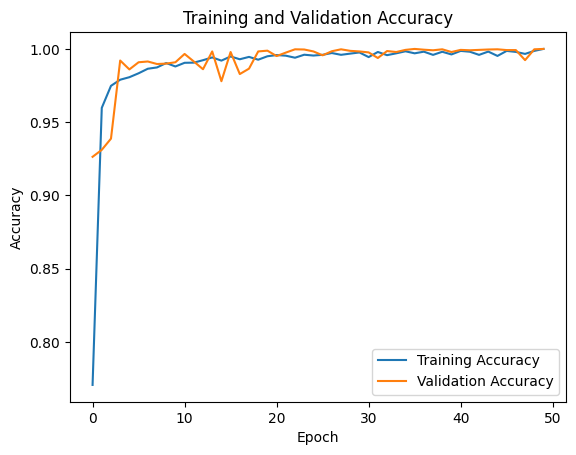

In [ ]:
# Plot training and validation accuracy curves
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

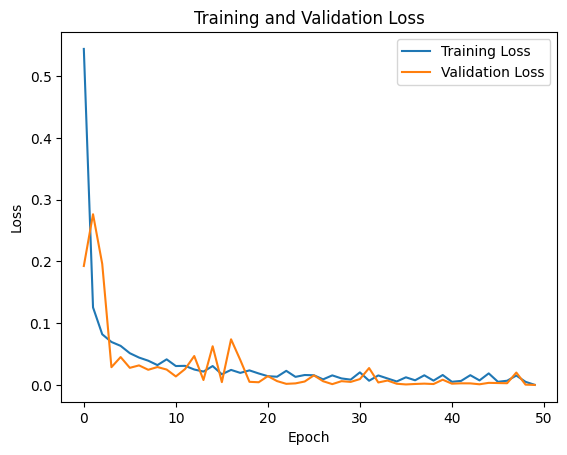

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation loss curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model
loss, accuracy = SBLSTM.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

297/297 [==============================] - 3s 5ms/step - loss: 3.6913e-05 - accuracy: 1.0000
Test Loss: 3.6912875657435507e-05, Test Accuracy: 1.0


In [ ]:
label_mapping = {
    0: 'Speed 1 Inclination 0',
    1: 'Speed 1 Inclination 5',
    2: 'Speed 1 Inclination 10',
    3: 'Speed 3 Inclination 0',
    4: 'Speed 3 Inclination 5',
    5: 'Speed 3 Inclination 10',
    6: 'Speed 5 Inclination 0',
    7: 'Speed 5 Inclination 5',
    8: 'Speed 5 Inclination 10',
}

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Assuming you have trained and tested your BSLTM model already
# Use the trained model to predict on test data
y_pred = SBLSTM.predict(X_test)

# Convert predictions back to labels
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# Generate classification report
print("Classification Report:")
print(classification_report(y_true_labels, y_pred_labels, target_names=label_mapping.values()))

297/297 [==============================] - 3s 4ms/step
Classification Report:
                        precision    recall  f1-score   support

 Speed 1 Inclination 0       1.00      1.00      1.00       117
 Speed 1 Inclination 5       1.00      1.00      1.00      1208
Speed 1 Inclination 10       1.00      1.00      1.00      1044
 Speed 3 Inclination 0       1.00      1.00      1.00      1225
 Speed 3 Inclination 5       1.00      1.00      1.00      1219
Speed 3 Inclination 10       1.00      1.00      1.00      1205
 Speed 5 Inclination 0       1.00      1.00      1.00      1112
 Speed 5 Inclination 5       1.00      1.00      1.00      1195
Speed 5 Inclination 10       1.00      1.00      1.00      1150

              accuracy                           1.00      9475
             macro avg       1.00      1.00      1.00      9475
          weighted avg       1.00      1.00      1.00      9475



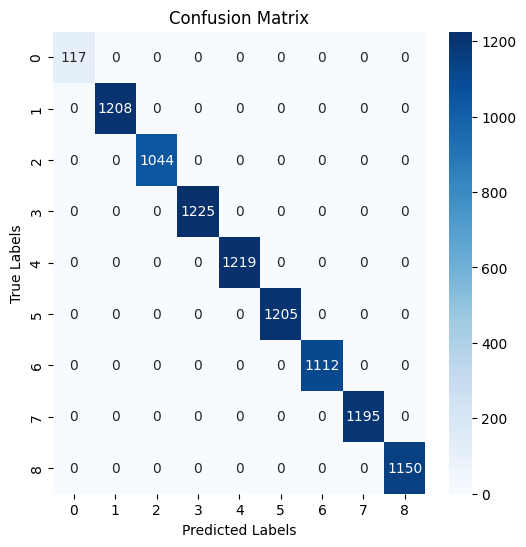

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get the confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
SBLSTM.save('/content/drive/MyDrive/BTP_2/SBLSTM_V.h5')

### Pradeep

In [ ]:
Pdf_S1_I0 = pd.read_csv('/content/drive/MyDrive/BTP_2/FSR_prep/Pradeep/Walk_S1_I0.txt')
Pdf_S1_I5 = pd.read_csv('/content/drive/MyDrive/BTP_2/FSR_prep/Pradeep/Walk_S1_I5.txt')
# Pdf_S1_I10 = pd.read_csv('/content/drive/MyDrive/BTP_2/FSR_prep/Pradeep/Walk_S1_I10.txt')
Pdf_S3_I0 = pd.read_csv('/content/drive/MyDrive/BTP_2/FSR_prep/Pradeep/Walk_S3_I0.txt')
Pdf_S3_I5 = pd.read_csv('/content/drive/MyDrive/BTP_2/FSR_prep/Pradeep/Walk_S3_I5.txt')
# Pdf_S3_I10 = pd.read_csv('/content/drive/MyDrive/BTP_2/FSR_prep/Pradeep/Walk_S3_I10.txt')
Pdf_S5_I0 = pd.read_csv('/content/drive/MyDrive/BTP_2/FSR_prep/Pradeep/Walk_S5_I0.txt')
Pdf_S5_I5 = pd.read_csv('/content/drive/MyDrive/BTP_2/FSR_prep/Pradeep/Walk_S5_I5.txt')
Pdf_S5_I10 = pd.read_csv('/content/drive/MyDrive/BTP_2/FSR_prep/Pradeep/Walk_S5_I10.txt')

In [ ]:
Pdf_S1_I0.shape

(58591, 6)

In [ ]:
def Resample(df):
  start_time = pd.Timestamp(0)  # Replace 'start_date_time' with your actual start time
  time_index = pd.date_range(start=start_time, periods=len(df), freq='1ms')

  # Assign the time index to the DataFrame
  df.index = time_index

  # Resample the data to 100Hz
  resampled_df = df.resample('10ms').mean()
  resampled_df.reset_index(drop=True, inplace=True)

  return resampled_df

Pdf_S1_I0 = Resample(Pdf_S1_I0)
Pdf_S1_I5 = Resample(Pdf_S1_I5)
# Pdf_S1_I10 = Resample(Pdf_S1_I10)
Pdf_S3_I0 = Resample(Pdf_S3_I0)
Pdf_S3_I5 = Resample(Pdf_S3_I5)
# Pdf_S3_I10 = Resample(Pdf_S3_I10)
Pdf_S5_I0 = Resample(Pdf_S5_I0)
Pdf_S5_I5 = Resample(Pdf_S5_I5)
Pdf_S5_I10 = Resample(Pdf_S5_I10)

In [ ]:
Pdf_S1_I0.shape

(5860, 6)

In [ ]:
# Normalize
def Normalize(df):
  for col in df.columns:
    df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

  return df

Pdf_S1_I0 = Normalize(Pdf_S1_I0)
Pdf_S1_I5 = Normalize(Pdf_S1_I5)
# Pdf_S1_I10 = Normalize(Pdf_S1_I10)
Pdf_S3_I0 = Normalize(Pdf_S3_I0)
Pdf_S3_I5 = Normalize(Pdf_S3_I5)
# Pdf_S3_I10 = Normalize(Pdf_S3_I10)
Pdf_S5_I0 = Normalize(Pdf_S5_I0)
Pdf_S5_I5 = Normalize(Pdf_S5_I5)
Pdf_S5_I10 = Normalize(Pdf_S5_I10)

In [ ]:
dfs = {
    'Pdf_S1_I0':Pdf_S1_I0,
    'Pdf_S1_I5':Pdf_S1_I5,
    # 'Pdf_S1_I10':Pdf_S1_I10,
    'Pdf_S3_I0':Pdf_S3_I0,
    'Pdf_S3_I5':Pdf_S3_I5,
    # 'Pdf_S3_I10':Pdf_S3_I10,
    'Pdf_S5_I0':Pdf_S5_I0,
    'Pdf_S5_I5':Pdf_S5_I5,
    'Pdf_S5_I10':Pdf_S5_I10
}

In [ ]:
import pandas as pd
import numpy as np

# Define sliding window size
window_size = 25  # You can adjust this according to your data

# Define feature extraction functions
def std(x):
    return np.std(x)

def mav(x):
    return np.mean(np.abs(x))

def maximum(x):
    return np.max(x)

def minimum(x):
    return np.min(x)

def median(x):
    return np.median(x)

# Define a function to apply sliding window and extract features
def extract_features(data, window_size):
    features = []
    for i in range(len(data) - window_size + 1):
        window = data[i:i+window_size]
        feature_vector = [
            std(window),
            mav(window),
            maximum(window),
            minimum(window),
            median(window)
        ]
        features.append(feature_vector)
    return features

# Define a function to extract features for a dataframe
def extract_features_dataframe(df, window_size):
    features = {}
    for column in df.columns:
        column_features = extract_features(df[column], window_size)
        feature_names = [f'{column}_{stat}' for stat in ['STD', 'MAV', 'MAX', 'MIN', 'MED']]
        for i, feature_name in enumerate(feature_names):
            features[feature_name] = [f[i] for f in column_features]
    features_df = pd.DataFrame(features)
    return features_df

# Extract features for each dataframe
for df_name, df in dfs.items():
    feature_df_name = f'feature_{df_name}'
    features_df = extract_features_dataframe(df, window_size)
    globals()[feature_df_name] = features_df  # Create a dataframe with a dynamic name using globals()

In [ ]:
feature_Pdf_S1_I0['Label'] = 0
feature_Pdf_S1_I5['Label'] = 1
# feature_Pdf_S1_I10['Label'] = 2
feature_Pdf_S3_I0['Label'] = 2
feature_Pdf_S3_I5['Label'] = 3
# feature_Pdf_S3_I10['Label'] = 5
feature_Pdf_S5_I0['Label'] = 4
feature_Pdf_S5_I5['Label'] = 5
feature_Pdf_S5_I10['Label'] = 6

In [ ]:
dfs_lst = [feature_Pdf_S1_I0, feature_Pdf_S1_I5, feature_Pdf_S3_I0, feature_Pdf_S3_I5, feature_Pdf_S5_I0,
           feature_Pdf_S5_I5, feature_Pdf_S5_I10]

# Concatenate the DataFrames
Pdf_final = pd.concat(dfs_lst, ignore_index=True)

# If you want to concatenate along axis=1 (columns), you can set axis=1:
# concatenated_df = pd.concat(dfs, axis=1)

# Print the concatenated DataFrame
Pdf_final.head()

,A_x_STD,A_x_MAV,A_x_MAX,A_x_MIN,A_x_MED,A_y_STD,A_y_MAV,A_y_MAX,A_y_MIN,A_y_MED,...,Toe_Left_MAV,Toe_Left_MAX,Toe_Left_MIN,Toe_Left_MED,Toe_Right_STD,Toe_Right_MAV,Toe_Right_MAX,Toe_Right_MIN,Toe_Right_MED,Label
0,0.087587,0.344045,0.588119,0.226774,0.320958,0.074696,0.703902,0.894264,0.541767,0.687247,...,0.429401,0.662461,0.119874,0.416404,0.072308,0.363333,0.479167,0.218750,0.385417,0
1,0.088329,0.342982,0.588119,0.226774,0.320958,0.075880,0.701487,0.894264,0.541767,0.686973,...,0.449842,0.662461,0.126183,0.460568,0.069430,0.373750,0.479167,0.229167,0.395833,0
2,0.088321,0.342997,0.588119,0.226774,0.320958,0.069078,0.692765,0.894264,0.541767,0.684301,...,0.469905,0.662461,0.148265,0.517350,0.067477,0.377917,0.479167,0.229167,0.395833,0
3,0.084459,0.334568,0.588119,0.226774,0.314283,0.056160,0.682615,0.828137,0.541767,0.674159,...,0.489338,0.662461,0.186120,0.555205,0.065131,0.383750,0.479167,0.229167,0.406250,0
4,0.067166,0.322468,0.539594,0.226774,0.307486,0.056409,0.681831,0.828137,0.541767,0.671281,...,0.507003,0.662461,0.261830,0.570978,0.063601,0.387500,0.479167,0.229167,0.406250,0


In [ ]:
Pdf_final = Pdf_final.dropna()

In [ ]:
Pdf_final.shape

(43042, 31)

In [ ]:
X = Pdf_final.drop(columns=['Label']).values
y = Pdf_final['Label'].values

# Encode target labels
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42, stratify = y)

In [ ]:
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
# Define input shape
input_shape = (1,30)

# Define SAE layers
sae_input = Input(shape=input_shape)
sae_hidden1 = Dense(128, activation='tanh')(sae_input)
sae_hidden2 = Dense(64, activation='tanh')(sae_hidden1)
sae_hidden3 = Dense(32, activation='tanh')(sae_hidden2)

# Define SAE model
sae_model = Model(inputs=sae_input, outputs=sae_hidden3)

# Define BiLSTM layers
bilstm_input = sae_model.output
bilstm1 = Bidirectional(LSTM(128, activation='tanh', return_sequences=True))(bilstm_input)
bilstm2 = Bidirectional(LSTM(64, activation='tanh', return_sequences=False))(bilstm1)

# Define dropout layer
dropout_layer = Dropout(0.5)(bilstm2)

# Define DNN layers
dnn_hidden1 = Dense(64, activation='relu')(dropout_layer)
dnn_hidden2 = Dense(32, activation='relu')(dnn_hidden1)
dnn_output = Dense(7, activation='softmax')(dnn_hidden2)

# Define the full model
full_model_P = Model(inputs=sae_model.input, outputs=dnn_output)

# Print model summary
full_model_P.summary()


Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 1, 30)]           0         
                                                                 
 dense_36 (Dense)            (None, 1, 128)            3968      
                                                                 
 dense_37 (Dense)            (None, 1, 64)             8256      
                                                                 
 dense_38 (Dense)            (None, 1, 32)             2080      
                                                                 
 bidirectional_12 (Bidirect  (None, 1, 256)            164864    
 ional)                                                          
                                                                 
 bidirectional_13 (Bidirect  (None, 128)               164352    
 ional)                                                   

In [ ]:
# Compile the model
full_model_P.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])# save best model
checkpoint = ModelCheckpoint(filepath = 'SBLSTM_P.h5', verbose = 1, save_best_only=True)
callbacks = [checkpoint]

In [ ]:
from datetime import datetime

start = datetime.now()

# Train the model
history = full_model_P.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose = 1, callbacks = callbacks)

duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/50
861/861 [==============================] - ETA: 0s - loss: 0.5524 - accuracy: 0.7791
Epoch 1: val_loss improved from inf to 0.24695, saving model to SBLSTM_P.h5
861/861 [==============================] - 23s 16ms/step - loss: 0.5524 - accuracy: 0.7791 - val_loss: 0.2470 - val_accuracy: 0.9139
Epoch 2/50
 11/861 [..............................] - ETA: 8s - loss: 0.2717 - accuracy: 0.8977

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


859/861 [============================>.] - ETA: 0s - loss: 0.2387 - accuracy: 0.9123
Epoch 2: val_loss improved from 0.24695 to 0.18216, saving model to SBLSTM_P.h5
861/861 [==============================] - 13s 15ms/step - loss: 0.2389 - accuracy: 0.9122 - val_loss: 0.1822 - val_accuracy: 0.9387
Epoch 3/50
860/861 [============================>.] - ETA: 0s - loss: 0.1628 - accuracy: 0.9419
Epoch 3: val_loss improved from 0.18216 to 0.09253, saving model to SBLSTM_P.h5
861/861 [==============================] - 13s 15ms/step - loss: 0.1628 - accuracy: 0.9419 - val_loss: 0.0925 - val_accuracy: 0.9717
Epoch 4/50
859/861 [============================>.] - ETA: 0s - loss: 0.1162 - accuracy: 0.9622
Epoch 4: val_loss did not improve from 0.09253
861/861 [==============================] - 12s 14ms/step - loss: 0.1162 - accuracy: 0.9622 - val_loss: 0.1329 - val_accuracy: 0.9551
Epoch 5/50
861/861 [==============================] - ETA: 0s - loss: 0.0938 - accuracy: 0.9697
Epoch 5: val_loss imp

In [ ]:
from tensorflow.keras.models import load_model

# Load the best model
SBLSTM = load_model('/content/SBLSTM_P.h5')

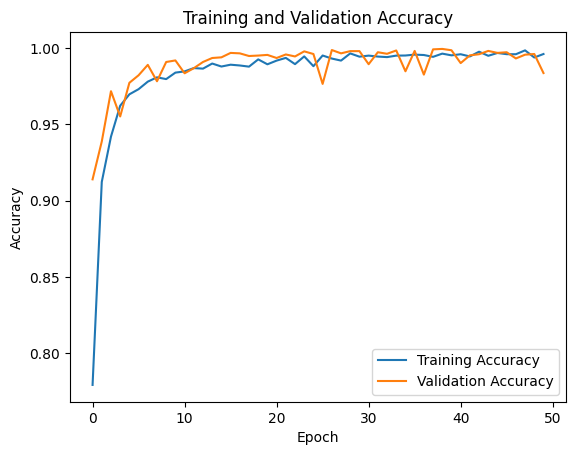

In [ ]:
# Plot training and validation accuracy curves
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

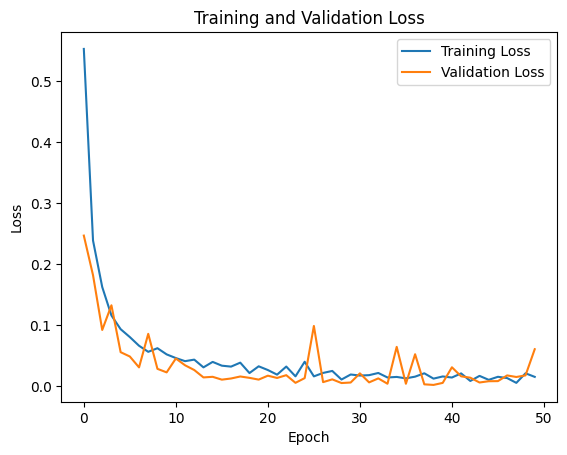

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation loss curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model
loss, accuracy = SBLSTM.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

270/270 [==============================] - 4s 8ms/step - loss: 0.0051 - accuracy: 0.9986
Test Loss: 0.005123088136315346, Test Accuracy: 0.9986060857772827


In [ ]:
label_mapping = {
    0: 'Speed 1 Inclination 0',
    1: 'Speed 1 Inclination 5',
    # 2: 'Speed 1 Inclination 10',
    2: 'Speed 3 Inclination 0',
    3: 'Speed 3 Inclination 5',
    # 5: 'Speed 3 Inclination 10',
    4: 'Speed 5 Inclination 0',
    5: 'Speed 5 Inclination 5',
    6: 'Speed 5 Inclination 10',
}

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Assuming you have trained and tested your BSLTM model already
# Use the trained model to predict on test data
y_pred = SBLSTM.predict(X_test)

# Convert predictions back to labels
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# Generate classification report
print("Classification Report:")
print(classification_report(y_true_labels, y_pred_labels, target_names=label_mapping.values()))

270/270 [==============================] - 3s 5ms/step
Classification Report:
                        precision    recall  f1-score   support

 Speed 1 Inclination 0       1.00      1.00      1.00      1167
 Speed 1 Inclination 5       1.00      1.00      1.00      1190
 Speed 3 Inclination 0       1.00      1.00      1.00      1167
 Speed 3 Inclination 5       1.00      1.00      1.00      1243
 Speed 5 Inclination 0       1.00      1.00      1.00      1229
 Speed 5 Inclination 5       1.00      1.00      1.00      1220
Speed 5 Inclination 10       1.00      1.00      1.00      1393

              accuracy                           1.00      8609
             macro avg       1.00      1.00      1.00      8609
          weighted avg       1.00      1.00      1.00      8609



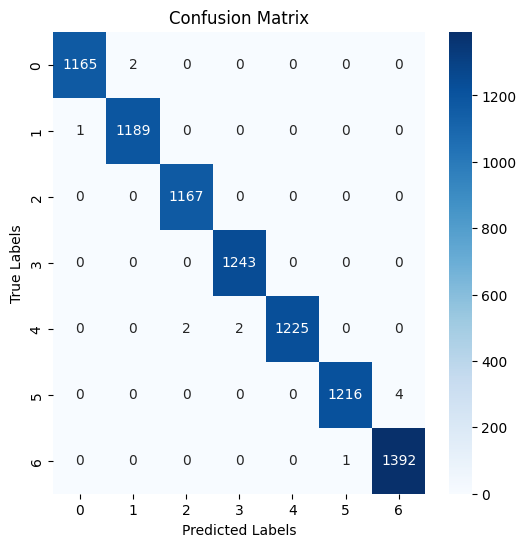

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get the confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
SBLSTM.save('/content/drive/MyDrive/BTP_2/SBLSTM_P.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Anfis

In [ ]:
! pip install anfis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=faee0e1af1f2aa6bb49ebdc412cb1e699713f26612f901d2eee26075b072114d
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [ ]:
! git clone https://github.com/twmeggs/anfis.git

Cloning into 'anfis'...
remote: Enumerating objects: 78, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 78 (delta 0), reused 7 (delta 0), pack-reused 69
Receiving objects: 100% (78/78), 20.06 KiB | 2.23 MiB/s, done.
Resolving deltas: 100% (31/31), done.


In [ ]:
%cd anfis

/content/anfis


In [ ]:
import anfis
# from anfis import anfis_model
from anfis.membership import mfDerivs
from anfis.membership import membershipfunction
import numpy

ModuleNotFoundError: No module named 'anfis.membership'